# ANALISIS INFORMACIÓN RECIBIDA
* PLAN
 * Leer Base de datos
 * Adaptar TRM e indicadores
 * Calcular fuentes mejor correlacionadas
 * Describir esta correlacion
* Validar multiagente
* Documentar
* Validar inclusión de fractales
* Conclusiones
* Envio profesora
* Escrbir a la profesora

# Notas documentación
Lag periodos futuros para futuras investigaciones


https://www.investing.com/indices/lbma-gold-fixing-price-historical-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## NOTAS TESIS
*  Caracterizar las series de los indicadores TRM, petroleo y oro

* Validar regresion multilineal entre las series

##  TRM

In [4]:
trm_df=pd.read_csv('1.DATOS/TRM.csv', sep=';',encoding = "ISO-8859-1", engine='python', decimal=",")

In [5]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date
0,30/12/2021,29/12/2021,4023.68,0.00,4,mié,0,1,2021-12-29
1,31/12/2021,30/12/2021,3981.16,-42.52,5,jue,0,0,2021-12-30
2,01/01/2022,31/12/2021,3981.16,0.00,6,vie,0,1,2021-12-31
3,02/01/2022,01/01/2022,3981.16,0.00,7,sáb,1,1,2022-01-01
4,03/01/2022,02/01/2022,3981.16,0.00,1,dom,1,1,2022-01-02
...,...,...,...,...,...,...,...,...,...
106,15/04/2022,14/04/2022,3737.32,0.00,5,jue,0,1,2022-04-14
107,16/04/2022,15/04/2022,3737.32,0.00,6,vie,0,1,2022-04-15
108,17/04/2022,16/04/2022,3737.32,0.00,7,sáb,1,1,2022-04-16
109,18/04/2022,17/04/2022,3737.32,0.00,1,dom,1,1,2022-04-17


In [6]:
petroleo_df=pd.read_csv('1.DATOS/DCOILBRENTEU.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [7]:
petroleo_df

,DATE,DCOILBRENTEU
0,2017-04-11,54.73
1,2017-04-12,54.75
2,2017-04-13,55.05
3,2017-04-14,.
4,2017-04-17,54.79
...,...,...
1300,2022-04-05,106.6
1301,2022-04-06,100.81
1302,2022-04-07,99.83
1303,2022-04-08,101.26


In [8]:
petroleo_df['DATE']=pd.to_datetime(petroleo_df['DATE'])

### Transformar archivo oro

In [9]:
oro_df=pd.read_csv('1.DATOS/LBMA_Gold.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [10]:
oro_df

,"ï»¿""Date""",Price,Open,High,Low,Vol.,Change %
0,"Apr 14, 2022","1,963.25","1,963.25","1,963.25","1,963.25",-,-0.68%
1,"Apr 13, 2022","1,976.75","1,976.75","1,976.75","1,976.75",-,0.81%
2,"Apr 12, 2022","1,960.85","1,960.85","1,960.85","1,960.85",-,0.48%
3,"Apr 11, 2022","1,951.55","1,951.55","1,951.55","1,951.55",-,0.52%
4,"Apr 08, 2022","1,941.40","1,941.40","1,941.40","1,941.40",-,0.47%
...,...,...,...,...,...,...,...
1140,"Oct 12, 2017","1,290.25","1,290.25","1,290.25","1,290.25",-,0.08%
1141,"Oct 11, 2017","1,289.25","1,289.25","1,289.25","1,289.25",-,-0.17%
1142,"Oct 10, 2017","1,291.40","1,291.40","1,291.40","1,291.40",-,0.99%
1143,"Oct 09, 2017","1,278.75","1,278.75","1,278.75","1,278.75",-,1.34%


In [11]:
oro_df.dtypes

ï»¿"Date"    object
Price        object
Open         object
High         object
Low          object
Vol.         object
Change %     object
dtype: object

In [12]:
oro_df['Price'] = oro_df['Price'].replace(',','', regex=True)

In [13]:
oro_df['Price']  = oro_df['Price'] .apply(pd.to_numeric,errors='coerce')

In [14]:
###oro_df.to_csv('1.DATOS/LBMA_GoldTrans.csv', sep=';',index=False)

In [15]:
oro_df=pd.read_csv('1.DATOS/LBMA_GoldTrans.csv', sep=';',encoding = "ISO-8859-1", engine='python', decimal=".")

In [16]:
oro_df

,Indice,Date,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,fecha
0,1145,"Oct 06, 2017",1261.80,1261.80,1261.80,1261.80,-,9.57%,2017,Oct,6,10,2017-10-06
1,1144,"Oct 09, 2017",1278.75,1278.75,1278.75,1278.75,-,1.34%,2017,Oct,9,10,2017-10-09
2,1143,"Oct 10, 2017",1291.40,1291.40,1291.40,1291.40,-,0.99%,2017,Oct,10,10,2017-10-10
3,1142,"Oct 11, 2017",1289.25,1289.25,1289.25,1289.25,-,-0.17%,2017,Oct,11,10,2017-10-11
4,1141,"Oct 12, 2017",1290.25,1290.25,1290.25,1290.25,-,0.08%,2017,Oct,12,10,2017-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13


### Aqui caracterizar los datos

# Procesamiento para correlaciones

In [17]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date
0,30/12/2021,29/12/2021,4023.68,0.00,4,mié,0,1,2021-12-29
1,31/12/2021,30/12/2021,3981.16,-42.52,5,jue,0,0,2021-12-30
2,01/01/2022,31/12/2021,3981.16,0.00,6,vie,0,1,2021-12-31
3,02/01/2022,01/01/2022,3981.16,0.00,7,sáb,1,1,2022-01-01
4,03/01/2022,02/01/2022,3981.16,0.00,1,dom,1,1,2022-01-02
...,...,...,...,...,...,...,...,...,...
106,15/04/2022,14/04/2022,3737.32,0.00,5,jue,0,1,2022-04-14
107,16/04/2022,15/04/2022,3737.32,0.00,6,vie,0,1,2022-04-15
108,17/04/2022,16/04/2022,3737.32,0.00,7,sáb,1,1,2022-04-16
109,18/04/2022,17/04/2022,3737.32,0.00,1,dom,1,1,2022-04-17


In [18]:
trm_df=trm_df[trm_df['Dif Cero']==0]

In [19]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date
1,31/12/2021,30/12/2021,3981.16,-42.52,5,jue,0,0,2021-12-30
5,04/01/2022,03/01/2022,4082.75,101.59,2,lun,0,0,2022-01-03
6,05/01/2022,04/01/2022,4084.11,1.36,3,mar,0,0,2022-01-04
7,06/01/2022,05/01/2022,4042.36,-41.75,4,mié,0,0,2022-01-05
8,07/01/2022,06/01/2022,4039.31,-3.05,5,jue,0,0,2022-01-06
...,...,...,...,...,...,...,...,...,...
100,09/04/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08
103,12/04/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11
104,13/04/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12
105,14/04/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13


In [20]:
trm_df['date_fin']=trm_df['date'].shift(periods=-1)

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_3688/1589833659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_df['date_fin']=trm_df['date'].shift(periods=-1)


In [21]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date,date_fin
1,31/12/2021,30/12/2021,3981.16,-42.52,5,jue,0,0,2021-12-30,2022-01-03
5,04/01/2022,03/01/2022,4082.75,101.59,2,lun,0,0,2022-01-03,2022-01-04
6,05/01/2022,04/01/2022,4084.11,1.36,3,mar,0,0,2022-01-04,2022-01-05
7,06/01/2022,05/01/2022,4042.36,-41.75,4,mié,0,0,2022-01-05,2022-01-06
8,07/01/2022,06/01/2022,4039.31,-3.05,5,jue,0,0,2022-01-06,2022-01-07
...,...,...,...,...,...,...,...,...,...,...
100,09/04/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08,2022-04-11
103,12/04/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11,2022-04-12
104,13/04/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12,2022-04-13
105,14/04/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13,2022-04-18


In [22]:
trm_df.dtypes

Fecha               object
fecha operación     object
TRM                float64
Diferencia         float64
Dia sem              int64
nom Dia Sem         object
fin Semana           int64
Dif Cero             int64
date                object
date_fin            object
dtype: object

In [23]:
trm_df['date']=pd.to_datetime(trm_df['date'])
trm_df['date_fin']=pd.to_datetime(trm_df['date_fin'])

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_3688/485099578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_df['date']=pd.to_datetime(trm_df['date'])
C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_3688/485099578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_df['date_fin']=pd.to_datetime(trm_df['date_fin'])


In [24]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date,date_fin
1,31/12/2021,30/12/2021,3981.16,-42.52,5,jue,0,0,2021-12-30,2022-01-03
5,04/01/2022,03/01/2022,4082.75,101.59,2,lun,0,0,2022-01-03,2022-01-04
6,05/01/2022,04/01/2022,4084.11,1.36,3,mar,0,0,2022-01-04,2022-01-05
7,06/01/2022,05/01/2022,4042.36,-41.75,4,mié,0,0,2022-01-05,2022-01-06
8,07/01/2022,06/01/2022,4039.31,-3.05,5,jue,0,0,2022-01-06,2022-01-07
...,...,...,...,...,...,...,...,...,...,...
100,09/04/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08,2022-04-11
103,12/04/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11,2022-04-12
104,13/04/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12,2022-04-13
105,14/04/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13,2022-04-18


# Leer Bases de datos

In [25]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

database_username = 'root'
database_password = 'Cidifo03%%'
database_ip       = '127.0.0.1:3307'
database_name     = 'tesis'

#sqlEngine       = create_engine('mysql+pymysql://root:@127.0.0.1', pool_recycle=3600)
sqlEngine       = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name), pool_recycle=1, pool_timeout=57600)
dbConnection    = sqlEngine.connect()

In [26]:
tweeter_dframe = pd.read_sql("select * from  tesis.t_tweets_new where created_at >= '2021-12-30 00:00:00'", dbConnection);

In [27]:
rss_dframe = pd.read_sql("select * from  tesis.t_rss_new where date >= '2021-12-30 00:00:00'", dbConnection);
dbConnection.close()

In [28]:
tweeter_dframe

,index,id,created_at,lang,id_fuente,full_text_Limpio,SentSQDM,SentTesis
0,56,1476344656724176896,2021-12-30 00:09:29,es,sergiodigra,toda nuestra solidaridad,-0.252000,-0.252000
1,5363,1476349565154603010,2021-12-30 00:29:00,en,JavierMejiaC,i think the main problem when discussing inequality is that it framed as something independent of any other social outcome ansary brings an interesting view when discussing the ummayad caliphate you like social stability but that tends to bring inequality,0.647000,0.647000
2,5596,1476355915234349061,2021-12-30 00:54:14,es,Jllanosala,lo del pot por decreto es una incoherencia inmensa pero la pregunta realmente importante es si es un buen pot mucho mejor que el que hundió el concejo en la administración anterior lo dejo como pregunta abierta bienvenidos sus comentarios,-1.000000,-1.000000
3,99,1476356746935472128,2021-12-30 00:57:32,es,sergiodigra,rt nos solidarizamos con ante los efectos de sismo ocurrido en la zona de amazonas que ha ocasionado considerables daños,-0.926000,-0.926000
4,5858,1476372840886808579,2021-12-30 02:01:29,es,JorgeATovar,excelente el ejercicio del dane después de corea del sur colombia es el primer país que las implementa oficialmente las primeras estimaciones para el país las hicimos con un orgullo que el dane tome el testigo,-0.472661,-0.443868
...,...,...,...,...,...,...,...,...
136168,2501,1516382895924920320,2022-04-19 11:47:10,es,rcnmundo,las cuentas de psg para ser campeón de liga las cuatro bajas que tendrá el miércoles,-0.950000,-0.950000
136169,1900,1516383126951534594,2022-04-19 11:48:05,ro,lafm,editorial de parte,-0.112000,-0.112000
136170,2500,1516383244475723779,2022-04-19 11:48:33,es,rcnmundo,ciudadanos se unen la búsqueda de homicidas del policía en cartagena,-0.409000,-0.409000
136171,4900,1516383583014998021,2022-04-19 11:49:53,es,freddykastro,rt historias como la de diego león marín nos inspiran él es un comerciante de medellín que recibe pagos digitales que pie,-0.905000,-0.905000


In [29]:
rss_dframe.rename(columns={'date':'date_rss'},inplace=True)

In [30]:
rss_dframe

,index,fuenteRss,idP,date_rss,lang,texto_Limpio,polaridad,polaridad_SQDM
0,39,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/14/mis_derechos/1642157881_085466.html#?ref=rss&format=simple&link=guid,2022-01-14 11:53:08,esp,caso djokovic cómo se castiga en españa quien falsifica las pruebas covid independientemente de las multas que pueden imponer las diferentes administraciones los hechos podrían ser delito,-0.999113,-0.994654
1,40,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/07/mis_derechos/1641564709_987707.html#?ref=rss&format=simple&link=guid,2022-01-08 09:49:12,esp,guía para las rebajas derecho de devolución garantía pago con datos personales expertas en consumo explican qué facultades asisten los ciudadanos las novedades legislativas que entran en vigor este año,-0.926199,-0.993272
2,0,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/mundo/unidos-tomo-rehenes-sinagoga-pedir-liberen-hermana-condenada-intentar-matar-soldados-afganistan_0_0Zb8XVHxL.html,2022-01-15 23:17:45,esp,estados unidos tomó rehenes en una sinagoga para pedir que liberen su hermana condenada por intentar matar soldados en afganistán ocurre en texas el fbi rodea la zona hay cuatro personas retenidas entre ellas el rabino,-0.982426,-0.998816
3,1,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/opinion/papelon-nicaragua-buscar-unidos-mano_0_VkDEQc4UR.html,2022-01-15 23:16:21,esp,del papelón en nicaragua buscar que estados unidos nos dé una mano cafiero se prueba el traje de canciller fernández se plancha el suyo para ver putin xi jinping,-0.872621,-0.989364
4,2,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/economia/-edesur-apagando-incendios-necesitamos-estabilidad-poder-planificar-_0_TOH2_j5Gy.html,2022-01-15 23:10:21,esp,en edesur estamos apagando incendios necesitamos estabilidad para poder planificar claudio cunha ceo de la distribuidora explica las razones de los cortes de los últimos días hace autocrítica pide disculpas pero reclama reglas del juego claras estables que no dependan de decisiones políticas,-0.907343,-0.999999
...,...,...,...,...,...,...,...,...
40030,5,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/turismo-razones-de-la-fuerte-reactivacion-de-viajes-y-hoteles-en-colombia-665572,2022-04-18 16:35:13,esp,el sector turismo colombiano pasa del rezago consolidar su recuperación oferta de sillas de colombianos que salen al exterior ya retornó nbsp los niveles de la prepandemia,0.827000,-0.913000
40031,6,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/china-impacto-del-confinamiento-en-shanghai-para-la-economia-665786,2022-04-18 12:53:26,esp,economía china crece en primer trimestre las restricciones sanitarias en algunas ciudades afectaron las cifras de comercio de empleo nbsp,-0.928000,-0.956000
40032,7,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/como-favoreceria-a-colombia-la-venta-de-petroleo-a-estados-unidos-665777,2022-04-18 12:31:17,esp,así favorecería colombia la venta de petróleo estados unidos la intención del gobierno es subir la producción barriles diarios en un año nbsp,-0.365000,-0.505000
40033,8,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/los-vientos-de-recesion-que-soplan-con-fuerza-en-reunion-del-fmi-665564,2022-04-18 12:15:47,esp,los riesgos siguen al alza análisis de ricardo ávila en un mundo con fuertes vientos de recesión colombia le puede ir mejor que la mayoría,-0.968000,-0.732000


In [31]:
tweeter_dframe['created_at']=pd.to_datetime(tweeter_dframe['created_at'])

In [32]:
rss_dframe['date_rss']=pd.to_datetime(rss_dframe['date_rss'])

### Maestro Fuentes

### Comparación con Indice

In [33]:
## merge in range

In [34]:
import sqlite3

In [35]:
#Make the db in memory
conn = sqlite3.connect(':memory:')

In [36]:
#write the tables
trm_df.to_sql('trm_df', conn, index=False)
tweeter_dframe.to_sql('tweeter_dframe', conn, index=False)
rss_dframe.to_sql('rss_dframe', conn, index=False)

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [37]:
qry = '''
    select  tweeter_dframe.*, trm_df.date, trm_df.date_fin
    from tweeter_dframe  left join  trm_df  
        on tweeter_dframe.created_at >= trm_df.date and 
        tweeter_dframe.created_at < trm_df.date_fin        
    '''

In [38]:
tweeter_dframe_new=pd.read_sql_query(qry, conn)

In [39]:
qry = '''
    select  rss_dframe.*, trm_df.date, trm_df.date_fin
    from rss_dframe  left join  trm_df  
        on rss_dframe.date_rss >= trm_df.date and 
        rss_dframe.date_rss < trm_df.date_fin        
    '''

In [40]:
rss_dframe_new=pd.read_sql_query(qry, conn)

In [41]:
tweeter_dframe_new.dtypes

index                 int64
id                    int64
created_at           object
lang                 object
id_fuente            object
full_text_Limpio     object
SentSQDM            float64
SentTesis           float64
date                 object
date_fin             object
dtype: object

In [42]:
rss_dframe_new.dtypes

index               int64
fuenteRss          object
idP                object
date_rss           object
lang               object
texto_Limpio       object
polaridad         float64
polaridad_SQDM    float64
date               object
date_fin           object
dtype: object

In [43]:
conn.close()

In [44]:
tweeter_dframe_new

,index,id,created_at,lang,id_fuente,full_text_Limpio,SentSQDM,SentTesis,date,date_fin
0,56,1476344656724176896,2021-12-30 00:09:29,es,sergiodigra,toda nuestra solidaridad,-0.252000,-0.252000,2021-12-30 00:00:00,2022-01-03 00:00:00
1,5363,1476349565154603010,2021-12-30 00:29:00,en,JavierMejiaC,i think the main problem when discussing inequality is that it framed as something independent of any other social outcome ansary brings an interesting view when discussing the ummayad caliphate you like social stability but that tends to bring inequality,0.647000,0.647000,2021-12-30 00:00:00,2022-01-03 00:00:00
2,5596,1476355915234349061,2021-12-30 00:54:14,es,Jllanosala,lo del pot por decreto es una incoherencia inmensa pero la pregunta realmente importante es si es un buen pot mucho mejor que el que hundió el concejo en la administración anterior lo dejo como pregunta abierta bienvenidos sus comentarios,-1.000000,-1.000000,2021-12-30 00:00:00,2022-01-03 00:00:00
3,99,1476356746935472128,2021-12-30 00:57:32,es,sergiodigra,rt nos solidarizamos con ante los efectos de sismo ocurrido en la zona de amazonas que ha ocasionado considerables daños,-0.926000,-0.926000,2021-12-30 00:00:00,2022-01-03 00:00:00
4,5858,1476372840886808579,2021-12-30 02:01:29,es,JorgeATovar,excelente el ejercicio del dane después de corea del sur colombia es el primer país que las implementa oficialmente las primeras estimaciones para el país las hicimos con un orgullo que el dane tome el testigo,-0.472661,-0.443868,2021-12-30 00:00:00,2022-01-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...
136168,2501,1516382895924920320,2022-04-19 11:47:10,es,rcnmundo,las cuentas de psg para ser campeón de liga las cuatro bajas que tendrá el miércoles,-0.950000,-0.950000,None,None
136169,1900,1516383126951534594,2022-04-19 11:48:05,ro,lafm,editorial de parte,-0.112000,-0.112000,None,None
136170,2500,1516383244475723779,2022-04-19 11:48:33,es,rcnmundo,ciudadanos se unen la búsqueda de homicidas del policía en cartagena,-0.409000,-0.409000,None,None
136171,4900,1516383583014998021,2022-04-19 11:49:53,es,freddykastro,rt historias como la de diego león marín nos inspiran él es un comerciante de medellín que recibe pagos digitales que pie,-0.905000,-0.905000,None,None


In [45]:
rss_dframe_new

,index,fuenteRss,idP,date_rss,lang,texto_Limpio,polaridad,polaridad_SQDM,date,date_fin
0,39,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/14/mis_derechos/1642157881_085466.html#?ref=rss&format=simple&link=guid,2022-01-14 11:53:08,esp,caso djokovic cómo se castiga en españa quien falsifica las pruebas covid independientemente de las multas que pueden imponer las diferentes administraciones los hechos podrían ser delito,-0.999113,-0.994654,2022-01-14 00:00:00,2022-01-18 00:00:00
1,40,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/07/mis_derechos/1641564709_987707.html#?ref=rss&format=simple&link=guid,2022-01-08 09:49:12,esp,guía para las rebajas derecho de devolución garantía pago con datos personales expertas en consumo explican qué facultades asisten los ciudadanos las novedades legislativas que entran en vigor este año,-0.926199,-0.993272,2022-01-07 00:00:00,2022-01-11 00:00:00
2,0,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/mundo/unidos-tomo-rehenes-sinagoga-pedir-liberen-hermana-condenada-intentar-matar-soldados-afganistan_0_0Zb8XVHxL.html,2022-01-15 23:17:45,esp,estados unidos tomó rehenes en una sinagoga para pedir que liberen su hermana condenada por intentar matar soldados en afganistán ocurre en texas el fbi rodea la zona hay cuatro personas retenidas entre ellas el rabino,-0.982426,-0.998816,2022-01-14 00:00:00,2022-01-18 00:00:00
3,1,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/opinion/papelon-nicaragua-buscar-unidos-mano_0_VkDEQc4UR.html,2022-01-15 23:16:21,esp,del papelón en nicaragua buscar que estados unidos nos dé una mano cafiero se prueba el traje de canciller fernández se plancha el suyo para ver putin xi jinping,-0.872621,-0.989364,2022-01-14 00:00:00,2022-01-18 00:00:00
4,2,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/economia/-edesur-apagando-incendios-necesitamos-estabilidad-poder-planificar-_0_TOH2_j5Gy.html,2022-01-15 23:10:21,esp,en edesur estamos apagando incendios necesitamos estabilidad para poder planificar claudio cunha ceo de la distribuidora explica las razones de los cortes de los últimos días hace autocrítica pide disculpas pero reclama reglas del juego claras estables que no dependan de decisiones políticas,-0.907343,-0.999999,2022-01-14 00:00:00,2022-01-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...
40030,5,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/turismo-razones-de-la-fuerte-reactivacion-de-viajes-y-hoteles-en-colombia-665572,2022-04-18 16:35:13,esp,el sector turismo colombiano pasa del rezago consolidar su recuperación oferta de sillas de colombianos que salen al exterior ya retornó nbsp los niveles de la prepandemia,0.827000,-0.913000,None,None
40031,6,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/china-impacto-del-confinamiento-en-shanghai-para-la-economia-665786,2022-04-18 12:53:26,esp,economía china crece en primer trimestre las restricciones sanitarias en algunas ciudades afectaron las cifras de comercio de empleo nbsp,-0.928000,-0.956000,None,None
40032,7,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/como-favoreceria-a-colombia-la-venta-de-petroleo-a-estados-unidos-665777,2022-04-18 12:31:17,esp,así favorecería colombia la venta de petróleo estados unidos la intención del gobierno es subir la producción barriles diarios en un año nbsp,-0.365000,-0.505000,None,None
40033,8,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/los-vientos-de-recesion-que-soplan-con-fuerza-en-reunion-del-fmi-665564,2022-04-18 12:15:47,esp,los riesgos siguen al alza análisis de ricardo ávila en un mundo con fuertes vientos de recesión colombia le puede ir mejor que la mayoría,-0.968000,-0.732000,None,None


In [46]:
tweeter_df_res=tweeter_dframe_new.groupby(['id_fuente','date'])[['SentTesis']].mean().reset_index()
tweeter_df_res['date']=pd.to_datetime(tweeter_df_res['date'])
tweeter_df_res

,id_fuente,date,SentTesis
0,Adcamach,2022-01-04,-0.306333
1,Adcamach,2022-01-11,0.365000
2,Adcamach,2022-01-12,-0.978000
3,Adcamach,2022-01-13,-0.996667
4,Adcamach,2022-01-19,-0.008500
...,...,...,...
3791,wef,2022-04-07,0.240417
3792,wef,2022-04-08,0.159167
3793,wef,2022-04-11,0.198333
3794,wef,2022-04-12,0.355000


In [47]:
tweeter_df_res.dtypes

id_fuente            object
date         datetime64[ns]
SentTesis           float64
dtype: object

In [48]:
rss_df_res=rss_dframe_new.groupby(['fuenteRss','date'])[['polaridad']].mean().reset_index()
rss_df_res['date']=pd.to_datetime(rss_df_res['date'])
rss_df_res

,fuenteRss,date,polaridad
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533
...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111


In [49]:
trm_df[['date','Diferencia']]

,date,Diferencia
1,2021-12-30,-42.52
5,2022-01-03,101.59
6,2022-01-04,1.36
7,2022-01-05,-41.75
8,2022-01-06,-3.05
...,...,...
100,2022-04-08,5.58
103,2022-04-11,-33.25
104,2022-04-12,-7.46
105,2022-04-13,0.62


In [50]:
trm_df.dtypes

Fecha                      object
fecha operación            object
TRM                       float64
Diferencia                float64
Dia sem                     int64
nom Dia Sem                object
fin Semana                  int64
Dif Cero                    int64
date               datetime64[ns]
date_fin           datetime64[ns]
dtype: object

In [51]:
tweeter_df_base=tweeter_df_res.merge(trm_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
tweeter_df_base

,id_fuente,date,SentTesis,Diferencia
0,Adcamach,2022-01-04,-0.306333,1.36
1,Adcamach,2022-01-11,0.365000,-31.81
2,Adcamach,2022-01-12,-0.978000,-41.57
3,Adcamach,2022-01-13,-0.996667,-19.68
4,Adcamach,2022-01-19,-0.008500,-29.42
...,...,...,...,...
3791,wef,2022-04-07,0.240417,25.32
3792,wef,2022-04-08,0.159167,5.58
3793,wef,2022-04-11,0.198333,-33.25
3794,wef,2022-04-12,0.355000,-7.46


In [52]:
tweeter_df_base['tipo']='twitter'

In [53]:
rss_df_base=rss_df_res.merge(trm_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
rss_df_base.columns=['id_fuente','date','SentTesis','Diferencia']
rss_df_base['tipo']='rss'
rss_df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382,43.25,rss
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700,38.56,rss
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733,21.45,rss
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265,7.91,rss
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533,16.84,rss
...,...,...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss


In [54]:
df_base=tweeter_df_base.append(rss_df_base)

In [55]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,Adcamach,2022-01-04,-0.306333,1.36,twitter
1,Adcamach,2022-01-11,0.365000,-31.81,twitter
2,Adcamach,2022-01-12,-0.978000,-41.57,twitter
3,Adcamach,2022-01-13,-0.996667,-19.68,twitter
4,Adcamach,2022-01-19,-0.008500,-29.42,twitter
...,...,...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss


In [56]:
df_base['id']=df_base["tipo"] + '_'+ df_base["id_fuente"]

In [57]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,1.36,twitter,twitter_Adcamach
1,Adcamach,2022-01-11,0.365000,-31.81,twitter,twitter_Adcamach
2,Adcamach,2022-01-12,-0.978000,-41.57,twitter,twitter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-19.68,twitter,twitter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-29.42,twitter,twitter_Adcamach
...,...,...,...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss,rss_https://www.eltiempo.com/rss/politica.xml
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss,rss_https://www.eltiempo.com/rss/politica.xml
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss,rss_https://www.eltiempo.com/rss/politica.xml
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [58]:
#pd.pivot_table(tweeter_df_res, values=[])

In [59]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.2.post1


In [60]:
df_base.to_csv('2.RESULTADOS/resultados_base_trm.csv')

### Recopilación resultados

In [61]:
resultados_df=df_base[['id']].value_counts().to_frame().reset_index()

In [62]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr()

In [63]:
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [64]:
res_resultados=resultados_df.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr']

In [65]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='pearson')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [66]:
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson']

In [67]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='kendall')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall']
#res_resultados

In [68]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='spearman')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall','corrSpearman']
#res_resultados

In [69]:
res_resultados['tipo']=np.where(res_resultados['id'].str[0]=='t','twitter','rss')

In [70]:
df_corr_trm=res_resultados.copy()

In [71]:
df_corr_trm=df_corr_trm.drop(columns=['corr'])

In [72]:
df_corr_trm=df_corr_trm[df_corr_trm['corrPearson'].notnull()]

In [73]:
df_corr_trm['abs_corr']=df_corr_trm['corrPearson'].abs()
df_corr_trm=df_corr_trm.sort_values('abs_corr', ascending=False)

In [74]:
df_corr_trm[df_corr_trm['tipo']=='twitter'].head(10)

,id,cuenta,corrPearson,corrKendall,corrSpearman,tipo,abs_corr
163,twitter_NoelMllr,2,-1.000000,-1.000000,-1.000000,twitter,1.000000
161,twitter_alhosu,6,0.821835,0.466667,0.542857,twitter,0.821835
154,twitter_amaldon19,12,0.439894,0.351155,0.483363,twitter,0.439894
158,twitter_jagallegod,10,0.395240,0.224733,0.297874,twitter,0.395240
33,twitter_Moliverag,54,-0.359436,-0.168532,-0.255318,twitter,0.359436
135,twitter_japebu,26,0.333437,0.256173,0.407490,twitter,0.333437
107,twitter_rcnmundo,39,0.323677,0.259284,0.364796,twitter,0.323677
15,twitter_mariovalencia01,61,-0.323033,-0.174460,-0.236776,twitter,0.323033
150,twitter_rafaelpuyana,16,-0.317522,-0.116667,-0.111765,twitter,0.317522
67,twitter_rcnradio,42,0.313246,0.229070,0.354376,twitter,0.313246


In [75]:
df_corr_trm[df_corr_trm['tipo']=='rss'].head(10)

,id,cuenta,corrPearson,corrKendall,corrSpearman,tipo,abs_corr
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.600000,-0.700000,rss,0.454443
131,rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,30,0.295048,0.138409,0.194302,rss,0.295048
116,rss_http://www.eltiempo.com/rss/cultura.xml,39,0.291446,0.194463,0.263070,rss,0.291446
102,rss_http://www.eltiempo.com/rss/economia.xml,40,0.290098,0.245029,0.341948,rss,0.290098
93,rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,41,-0.265118,-0.239316,-0.354038,rss,0.265118
124,rss_http://www.eltiempo.com/rss/mundo.xml,38,0.256088,0.159431,0.228484,rss,0.256088
70,rss_http://www.eltiempo.com/rss/economia_sectores.xml,42,0.253012,0.191861,0.277310,rss,0.253012
74,rss_http://www.eltiempo.com/rss/economia_finanzas-personales.xml,42,0.250002,0.173256,0.280470,rss,0.250002
62,rss_http://www.portafolio.co/rss/economia/empleo,44,0.234427,0.224339,0.319755,rss,0.234427
42,rss_https://feeds.a.dj.com/rss/RSSWSJD.xml,51,0.226661,0.178179,0.275623,rss,0.226661


### Graficas

In [76]:
import seaborn as sns

Text(0.5, 0.98, 'tweeter_amaldon19')

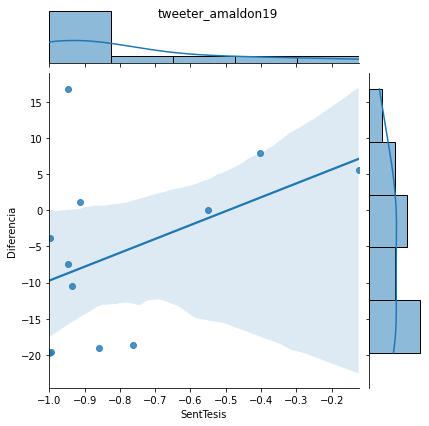

In [77]:
#df_base.groupby('id')[['SentTesis','Diferencia']]
df_graf=df_base[df_base['id']=='twitter_amaldon19'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
ax.fig.suptitle('tweeter_amaldon19')
#ax.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

Text(0.5, 0.98, 'twitter_Moliverag')

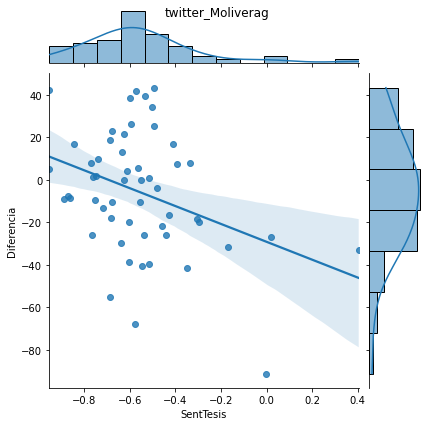

In [78]:
df_graf=df_base[df_base['id']=='twitter_Moliverag'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
ax.fig.suptitle('twitter_Moliverag')

Text(0.5, 0.98, 'twitter_jagallegod')

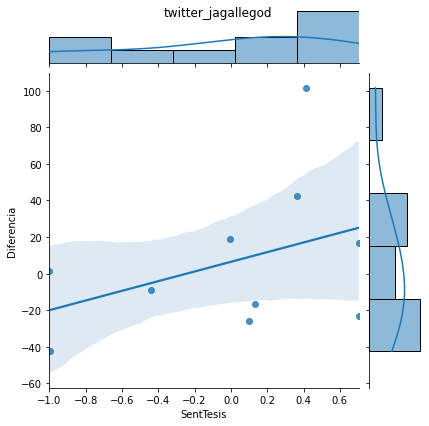

In [79]:
df_graf=df_base[df_base['id']=='twitter_jagallegod'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
ax.fig.suptitle('twitter_jagallegod')

Text(0.5, 1.2, 'twitter_rcnmundo')

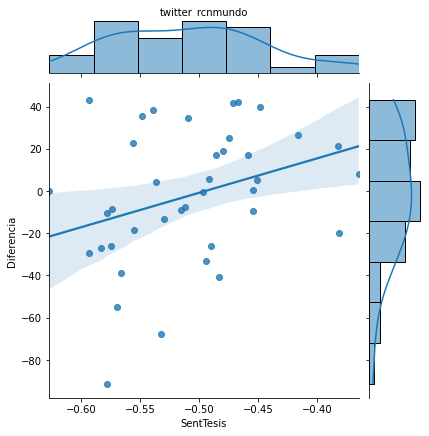

In [80]:
df_graf=df_base[df_base['id']=='twitter_rcnmundo'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
#ax.fig.suptitle('twitter_rcnmundo')
plt.title('twitter_rcnmundo', y=1.2, fontsize = 10)
#plt.title('twitter_rcnmundo')

Text(0.5, 1.2, 'rss www.nytimes.com YourMoney')

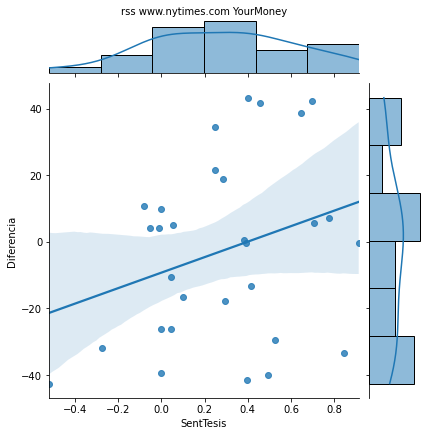

In [81]:
df_graf=df_base[df_base['id']=='rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('rss www.nytimes.com YourMoney', y=1.2, fontsize = 10)
#ax.fig.suptitle('rss www.nytimes YourMoney')

Text(0.5, 1.2, 'rss www.eltiempo.com Cultura')

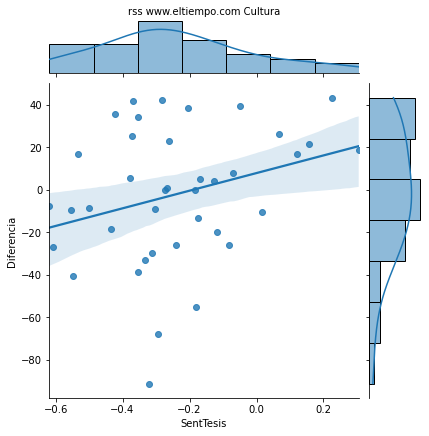

In [82]:
df_graf=df_base[df_base['id']=='rss_http://www.eltiempo.com/rss/cultura.xml'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('rss www.eltiempo.com Cultura', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'rss www.eltiempo.com Econimia')

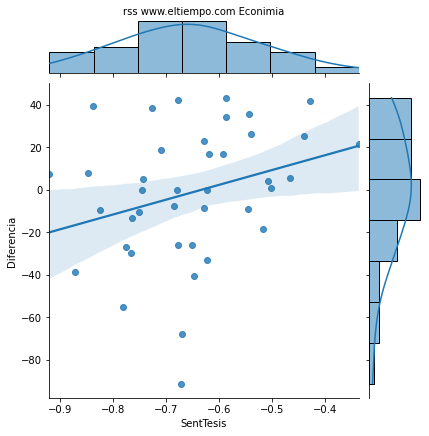

In [83]:
df_graf=df_base[df_base['id']=='rss_http://www.eltiempo.com/rss/economia.xml'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('rss www.eltiempo.com Econimia', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'rss WallStreet Journal Noticias Mundo')

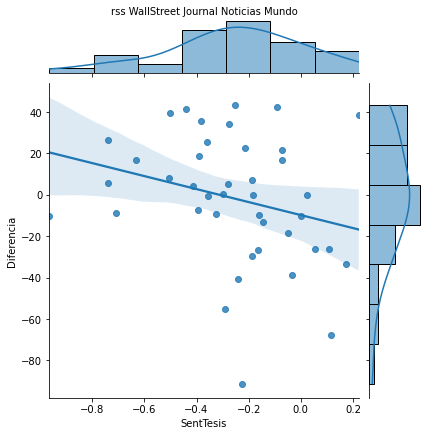

In [84]:
df_graf=df_base[df_base['id']=='rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('rss WallStreet Journal Noticias Mundo', y=1.2, fontsize = 10)

In [85]:
### aqui voy comparar twitter vs rss

In [86]:
df_corr_trm

,id,cuenta,corrPearson,corrKendall,corrSpearman,tipo,abs_corr
163,twitter_NoelMllr,2,-1.000000,-1.000000,-1.000000,twitter,1.000000
161,twitter_alhosu,6,0.821835,0.466667,0.542857,twitter,0.821835
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.600000,-0.700000,rss,0.454443
154,twitter_amaldon19,12,0.439894,0.351155,0.483363,twitter,0.439894
158,twitter_jagallegod,10,0.395240,0.224733,0.297874,twitter,0.395240
...,...,...,...,...,...,...,...
146,rss_http://ep00.epimg.net/rss/economia/portada.xml,18,-0.006890,-0.052808,-0.042377,rss,0.006890
117,twitter_MauricioCard,39,-0.004275,0.000000,0.022673,twitter,0.004275
53,rss_http://www.eltiempo.com/rss/mundo_asia.xml,46,-0.002304,0.026112,0.040521,rss,0.002304
72,rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml,42,-0.001541,-0.012791,0.003160,rss,0.001541


<AxesSubplot:title={'center':'abs_corr'}, xlabel='tipo'>

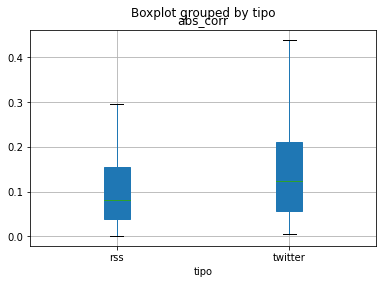

In [87]:
df_corr_trm[df_corr_trm['cuenta']>=7].boxplot(column = 'abs_corr', by = 'tipo', patch_artist = True)

In [88]:
#guardar Resultado para comparación
res_corr_trm=res_resultados.copy()

In [89]:
res_resultados.to_csv('2.RESULTADOS/resultados_corr_trm.csv')

### Regresión Multilineal  (nuevo Script para no afectar librerias)
#### Preprocesamiento de la información

In [90]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,1.36,twitter,twitter_Adcamach
1,Adcamach,2022-01-11,0.365000,-31.81,twitter,twitter_Adcamach
2,Adcamach,2022-01-12,-0.978000,-41.57,twitter,twitter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-19.68,twitter,twitter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-29.42,twitter,twitter_Adcamach
...,...,...,...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss,rss_https://www.eltiempo.com/rss/politica.xml
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss,rss_https://www.eltiempo.com/rss/politica.xml
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss,rss_https://www.eltiempo.com/rss/politica.xml
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [91]:
df_base_pivot=pd.pivot_table(df_base, values=['SentTesis'], index=['date'], columns=['id'])

In [92]:
df_base_pivot=df_base_pivot.droplevel(0, axis='columns')

In [93]:
df_base_pivot

id,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_mpapell,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,0.441825,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.799667,NaN,NaN
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.592650,NaN,NaN,NaN,...,-0.871000,-0.948,NaN,NaN,NaN,NaN,NaN,-0.707000,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,-0.051600,NaN,NaN,NaN,...,NaN,NaN,-0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.510600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.962000,NaN,NaN
2022-01-06,NaN,NaN,NaN,NaN,NaN,NaN,-0.474600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.276211,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,NaN,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,NaN,NaN,NaN,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,NaN,0.240417
2022-04-08,-0.477067,NaN,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,-0.345333,NaN,NaN,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,NaN,0.159167
2022-04-11,-0.403324,NaN,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,NaN,NaN,NaN,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,NaN,0.198333


In [94]:
df_base_pivot.fillna(0,inplace=True)

In [95]:
df_base_pivot=df_base_pivot.merge(trm_df[['date','Diferencia']], left_index=True, right_on=['date'], how='left')

In [96]:
df_base_pivot.set_index('date', inplace=True)

In [97]:
df_base_pivot

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.799667,0.000000,0.000000,-42.52
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.000000,0.000000,101.59
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.36
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000,-41.75
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000,-3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417,25.32
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167,5.58
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333,-33.25


In [98]:
df_base_pivot.to_csv('2.RESULTADOS/base_reg_trm.csv')

# PETROLEO

In [99]:
petroleo_df.dtypes

DATE            datetime64[ns]
DCOILBRENTEU            object
dtype: object

In [100]:
petroleo_df['valor']=np.where(petroleo_df['DCOILBRENTEU']=='.',0,petroleo_df['DCOILBRENTEU'])

In [101]:
petroleo_df

,DATE,DCOILBRENTEU,valor
0,2017-04-11,54.73,54.73
1,2017-04-12,54.75,54.75
2,2017-04-13,55.05,55.05
3,2017-04-14,.,0
4,2017-04-17,54.79,54.79
...,...,...,...
1300,2022-04-05,106.6,106.6
1301,2022-04-06,100.81,100.81
1302,2022-04-07,99.83,99.83
1303,2022-04-08,101.26,101.26


In [102]:
petroleo_df['valor']=petroleo_df['valor'].astype(float)

In [103]:
petroleo_df=petroleo_df[petroleo_df['valor']!=0]

In [104]:
#cortar periodo
petroleo_df=petroleo_df[petroleo_df['DATE']>='2021-12-30']

In [105]:
petroleo_df

,DATE,DCOILBRENTEU,valor
1232,2021-12-30,78.61,78.61
1233,2021-12-31,77.24,77.24
1234,2022-01-03,78.25,78.25
1235,2022-01-04,79.39,79.39
1236,2022-01-05,80.6,80.60
...,...,...,...
1300,2022-04-05,106.6,106.60
1301,2022-04-06,100.81,100.81
1302,2022-04-07,99.83,99.83
1303,2022-04-08,101.26,101.26


In [106]:
petroleo_df['date_fin']=petroleo_df['DATE'].shift(periods=-1)

In [107]:
petroleo_df['Diferencia']=petroleo_df['valor'].diff(-1)

In [108]:
petroleo_df.rename(columns={'DATE':'date'}, inplace=True)

In [109]:
petroleo_df

,date,DCOILBRENTEU,valor,date_fin,Diferencia
1232,2021-12-30,78.61,78.61,2021-12-31,1.37
1233,2021-12-31,77.24,77.24,2022-01-03,-1.01
1234,2022-01-03,78.25,78.25,2022-01-04,-1.14
1235,2022-01-04,79.39,79.39,2022-01-05,-1.21
1236,2022-01-05,80.6,80.60,2022-01-06,-1.39
...,...,...,...,...,...
1300,2022-04-05,106.6,106.60,2022-04-06,5.79
1301,2022-04-06,100.81,100.81,2022-04-07,0.98
1302,2022-04-07,99.83,99.83,2022-04-08,-1.43
1303,2022-04-08,101.26,101.26,2022-04-11,3.34


In [110]:
## aqui voy

In [111]:
#Make the db in memory
conn = sqlite3.connect(':memory:')

In [112]:
#write the tables
petroleo_df.to_sql('petroleo_df', conn, index=False)
tweeter_dframe.to_sql('tweeter_dframe', conn, index=False)
rss_dframe.to_sql('rss_dframe', conn, index=False)

In [113]:
qry = '''
    select  tweeter_dframe.*, petroleo_df.date, petroleo_df.date_fin
    from tweeter_dframe  left join  petroleo_df  
        on tweeter_dframe.created_at >= petroleo_df.date and 
        tweeter_dframe.created_at < petroleo_df.date_fin        
    '''

In [114]:
tweeter_dframe_new=pd.read_sql_query(qry, conn)

In [115]:
qry = '''
    select  rss_dframe.*, petroleo_df.date, petroleo_df.date_fin
    from rss_dframe  left join  petroleo_df  
        on rss_dframe.date_rss >= petroleo_df.date and 
        rss_dframe.date_rss < petroleo_df.date_fin        
    '''

In [116]:
rss_dframe_new=pd.read_sql_query(qry, conn)

In [117]:
tweeter_dframe_new.dtypes

index                 int64
id                    int64
created_at           object
lang                 object
id_fuente            object
full_text_Limpio     object
SentSQDM            float64
SentTesis           float64
date                 object
date_fin             object
dtype: object

In [118]:
rss_dframe_new.dtypes

index               int64
fuenteRss          object
idP                object
date_rss           object
lang               object
texto_Limpio       object
polaridad         float64
polaridad_SQDM    float64
date               object
date_fin           object
dtype: object

In [119]:
conn.close()

In [120]:
tweeter_dframe_new

,index,id,created_at,lang,id_fuente,full_text_Limpio,SentSQDM,SentTesis,date,date_fin
0,56,1476344656724176896,2021-12-30 00:09:29,es,sergiodigra,toda nuestra solidaridad,-0.252000,-0.252000,2021-12-30 00:00:00,2021-12-31 00:00:00
1,5363,1476349565154603010,2021-12-30 00:29:00,en,JavierMejiaC,i think the main problem when discussing inequality is that it framed as something independent of any other social outcome ansary brings an interesting view when discussing the ummayad caliphate you like social stability but that tends to bring inequality,0.647000,0.647000,2021-12-30 00:00:00,2021-12-31 00:00:00
2,5596,1476355915234349061,2021-12-30 00:54:14,es,Jllanosala,lo del pot por decreto es una incoherencia inmensa pero la pregunta realmente importante es si es un buen pot mucho mejor que el que hundió el concejo en la administración anterior lo dejo como pregunta abierta bienvenidos sus comentarios,-1.000000,-1.000000,2021-12-30 00:00:00,2021-12-31 00:00:00
3,99,1476356746935472128,2021-12-30 00:57:32,es,sergiodigra,rt nos solidarizamos con ante los efectos de sismo ocurrido en la zona de amazonas que ha ocasionado considerables daños,-0.926000,-0.926000,2021-12-30 00:00:00,2021-12-31 00:00:00
4,5858,1476372840886808579,2021-12-30 02:01:29,es,JorgeATovar,excelente el ejercicio del dane después de corea del sur colombia es el primer país que las implementa oficialmente las primeras estimaciones para el país las hicimos con un orgullo que el dane tome el testigo,-0.472661,-0.443868,2021-12-30 00:00:00,2021-12-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...
136168,2501,1516382895924920320,2022-04-19 11:47:10,es,rcnmundo,las cuentas de psg para ser campeón de liga las cuatro bajas que tendrá el miércoles,-0.950000,-0.950000,None,None
136169,1900,1516383126951534594,2022-04-19 11:48:05,ro,lafm,editorial de parte,-0.112000,-0.112000,None,None
136170,2500,1516383244475723779,2022-04-19 11:48:33,es,rcnmundo,ciudadanos se unen la búsqueda de homicidas del policía en cartagena,-0.409000,-0.409000,None,None
136171,4900,1516383583014998021,2022-04-19 11:49:53,es,freddykastro,rt historias como la de diego león marín nos inspiran él es un comerciante de medellín que recibe pagos digitales que pie,-0.905000,-0.905000,None,None


In [121]:
rss_dframe_new

,index,fuenteRss,idP,date_rss,lang,texto_Limpio,polaridad,polaridad_SQDM,date,date_fin
0,39,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/14/mis_derechos/1642157881_085466.html#?ref=rss&format=simple&link=guid,2022-01-14 11:53:08,esp,caso djokovic cómo se castiga en españa quien falsifica las pruebas covid independientemente de las multas que pueden imponer las diferentes administraciones los hechos podrían ser delito,-0.999113,-0.994654,2022-01-14 00:00:00,2022-01-17 00:00:00
1,40,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/07/mis_derechos/1641564709_987707.html#?ref=rss&format=simple&link=guid,2022-01-08 09:49:12,esp,guía para las rebajas derecho de devolución garantía pago con datos personales expertas en consumo explican qué facultades asisten los ciudadanos las novedades legislativas que entran en vigor este año,-0.926199,-0.993272,2022-01-07 00:00:00,2022-01-10 00:00:00
2,0,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/mundo/unidos-tomo-rehenes-sinagoga-pedir-liberen-hermana-condenada-intentar-matar-soldados-afganistan_0_0Zb8XVHxL.html,2022-01-15 23:17:45,esp,estados unidos tomó rehenes en una sinagoga para pedir que liberen su hermana condenada por intentar matar soldados en afganistán ocurre en texas el fbi rodea la zona hay cuatro personas retenidas entre ellas el rabino,-0.982426,-0.998816,2022-01-14 00:00:00,2022-01-17 00:00:00
3,1,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/opinion/papelon-nicaragua-buscar-unidos-mano_0_VkDEQc4UR.html,2022-01-15 23:16:21,esp,del papelón en nicaragua buscar que estados unidos nos dé una mano cafiero se prueba el traje de canciller fernández se plancha el suyo para ver putin xi jinping,-0.872621,-0.989364,2022-01-14 00:00:00,2022-01-17 00:00:00
4,2,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/economia/-edesur-apagando-incendios-necesitamos-estabilidad-poder-planificar-_0_TOH2_j5Gy.html,2022-01-15 23:10:21,esp,en edesur estamos apagando incendios necesitamos estabilidad para poder planificar claudio cunha ceo de la distribuidora explica las razones de los cortes de los últimos días hace autocrítica pide disculpas pero reclama reglas del juego claras estables que no dependan de decisiones políticas,-0.907343,-0.999999,2022-01-14 00:00:00,2022-01-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...
40030,5,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/turismo-razones-de-la-fuerte-reactivacion-de-viajes-y-hoteles-en-colombia-665572,2022-04-18 16:35:13,esp,el sector turismo colombiano pasa del rezago consolidar su recuperación oferta de sillas de colombianos que salen al exterior ya retornó nbsp los niveles de la prepandemia,0.827000,-0.913000,None,None
40031,6,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/china-impacto-del-confinamiento-en-shanghai-para-la-economia-665786,2022-04-18 12:53:26,esp,economía china crece en primer trimestre las restricciones sanitarias en algunas ciudades afectaron las cifras de comercio de empleo nbsp,-0.928000,-0.956000,None,None
40032,7,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/como-favoreceria-a-colombia-la-venta-de-petroleo-a-estados-unidos-665777,2022-04-18 12:31:17,esp,así favorecería colombia la venta de petróleo estados unidos la intención del gobierno es subir la producción barriles diarios en un año nbsp,-0.365000,-0.505000,None,None
40033,8,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/los-vientos-de-recesion-que-soplan-con-fuerza-en-reunion-del-fmi-665564,2022-04-18 12:15:47,esp,los riesgos siguen al alza análisis de ricardo ávila en un mundo con fuertes vientos de recesión colombia le puede ir mejor que la mayoría,-0.968000,-0.732000,None,None


In [122]:
tweeter_df_res=tweeter_dframe_new.groupby(['id_fuente','date'])[['SentTesis']].mean().reset_index()
tweeter_df_res['date']=pd.to_datetime(tweeter_df_res['date'])
tweeter_df_res

,id_fuente,date,SentTesis
0,Adcamach,2022-01-04,-0.306333
1,Adcamach,2022-01-11,0.365000
2,Adcamach,2022-01-12,-0.978000
3,Adcamach,2022-01-13,-0.996667
4,Adcamach,2022-01-19,-0.008500
...,...,...,...
3786,wef,2022-04-04,0.356000
3787,wef,2022-04-05,0.395250
3788,wef,2022-04-06,0.292583
3789,wef,2022-04-07,0.240417


In [123]:
tweeter_df_res.dtypes

id_fuente            object
date         datetime64[ns]
SentTesis           float64
dtype: object

In [124]:
rss_df_res=rss_dframe_new.groupby(['fuenteRss','date'])[['polaridad']].mean().reset_index()
rss_df_res['date']=pd.to_datetime(rss_df_res['date'])
rss_df_res

,fuenteRss,date,polaridad
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533
...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833


In [125]:
petroleo_df[['date','Diferencia']]

,date,Diferencia
1232,2021-12-30,1.37
1233,2021-12-31,-1.01
1234,2022-01-03,-1.14
1235,2022-01-04,-1.21
1236,2022-01-05,-1.39
...,...,...
1300,2022-04-05,5.79
1301,2022-04-06,0.98
1302,2022-04-07,-1.43
1303,2022-04-08,3.34


In [126]:
trm_df.dtypes

Fecha                      object
fecha operación            object
TRM                       float64
Diferencia                float64
Dia sem                     int64
nom Dia Sem                object
fin Semana                  int64
Dif Cero                    int64
date               datetime64[ns]
date_fin           datetime64[ns]
dtype: object

In [127]:
tweeter_df_base=tweeter_df_res.merge(petroleo_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
tweeter_df_base

,id_fuente,date,SentTesis,Diferencia
0,Adcamach,2022-01-04,-0.306333,-1.21
1,Adcamach,2022-01-11,0.365000,-0.85
2,Adcamach,2022-01-12,-0.978000,0.03
3,Adcamach,2022-01-13,-0.996667,-1.37
4,Adcamach,2022-01-19,-0.008500,-0.11
...,...,...,...,...
3786,wef,2022-04-04,0.356000,1.55
3787,wef,2022-04-05,0.395250,5.79
3788,wef,2022-04-06,0.292583,0.98
3789,wef,2022-04-07,0.240417,-1.43


In [128]:
tweeter_df_base['tipo']='twitter'

In [129]:
rss_df_base=rss_df_res.merge(petroleo_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
rss_df_base.columns=['id_fuente','date','SentTesis','Diferencia']
rss_df_base['tipo']='rss'
rss_df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382,-0.65,rss
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700,-0.88,rss
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733,3.23,rss
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265,0.99,rss
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533,2.16,rss
...,...,...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333,1.55,rss
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000,5.79,rss
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333,0.98,rss
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,-1.43,rss


In [130]:
df_base=tweeter_df_base.append(rss_df_base)

In [131]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,Adcamach,2022-01-04,-0.306333,-1.21,twitter
1,Adcamach,2022-01-11,0.365000,-0.85,twitter
2,Adcamach,2022-01-12,-0.978000,0.03,twitter
3,Adcamach,2022-01-13,-0.996667,-1.37,twitter
4,Adcamach,2022-01-19,-0.008500,-0.11,twitter
...,...,...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333,1.55,rss
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000,5.79,rss
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333,0.98,rss
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,-1.43,rss


In [132]:
df_base['id']=df_base["tipo"] + '_'+ df_base["id_fuente"]

In [133]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,-1.21,twitter,twitter_Adcamach
1,Adcamach,2022-01-11,0.365000,-0.85,twitter,twitter_Adcamach
2,Adcamach,2022-01-12,-0.978000,0.03,twitter,twitter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-1.37,twitter,twitter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-0.11,twitter,twitter_Adcamach
...,...,...,...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333,1.55,rss,rss_https://www.eltiempo.com/rss/politica.xml
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000,5.79,rss,rss_https://www.eltiempo.com/rss/politica.xml
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333,0.98,rss,rss_https://www.eltiempo.com/rss/politica.xml
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,-1.43,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [134]:
#pd.pivot_table(tweeter_df_res, values=[])

In [135]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.2.post1


In [136]:
df_base.to_csv('2.RESULTADOS/resultados_base_petroleo.csv')

### Recopilación resultados

In [137]:
resultados_df=df_base[['id']].value_counts().to_frame().reset_index()

In [138]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr()

In [139]:
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [140]:
res_resultados=resultados_df.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr']

In [141]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='pearson')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [142]:
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson']

In [143]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='kendall')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall
0,twitter_MantillaIgnacio,71,-0.157514,-0.157514,-0.116345
1,twitter_BancoRepublica,71,-0.030168,-0.030168,-0.043093
2,twitter_NASA,69,-0.036942,-0.036942,-0.073758
3,twitter_ecofeminita,68,0.018170,0.018170,0.043975
4,twitter_Fondosdepension,68,0.112003,0.112003,0.009670
...,...,...,...,...,...
161,twitter_alhosu,6,0.441420,0.441420,0.466667
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.826167,0.826167,0.600000
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000
164,twitter_jscorrales,1,NaN,NaN,NaN


In [144]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='spearman')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall','corrSpearman']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
0,twitter_MantillaIgnacio,71,-0.157514,-0.157514,-0.116345,-0.176478
1,twitter_BancoRepublica,71,-0.030168,-0.030168,-0.043093,-0.068882
2,twitter_NASA,69,-0.036942,-0.036942,-0.073758,-0.095817
3,twitter_ecofeminita,68,0.018170,0.018170,0.043975,0.061522
4,twitter_Fondosdepension,68,0.112003,0.112003,0.009670,0.011911
...,...,...,...,...,...,...
161,twitter_alhosu,6,0.441420,0.441420,0.466667,0.714286
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.826167,0.826167,0.600000,0.700000
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,1.000000
164,twitter_jscorrales,1,NaN,NaN,NaN,NaN


In [145]:
res_resultados.sort_values('corrSpearman').head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
157,twitter_razuero,10,-0.859043,-0.859043,-0.644503,-0.806644
18,twitter_Jllanosala,60,-0.318017,-0.318017,-0.252998,-0.382981
122,rss_http://feeds.washingtonpost.com/rss/rss_morning-mix,37,-0.236653,-0.236653,-0.234234,-0.306543
115,rss_http://www.eltiempo.com/rss/deportes.xml,38,-0.214203,-0.214203,-0.165125,-0.258248
133,twitter_LuisFerMejia,26,-0.167466,-0.167466,-0.178147,-0.256727
32,twitter_RodLuisAlberto,55,-0.273676,-0.273676,-0.159919,-0.250212
104,twitter_CaracolRadio,39,-0.184766,-0.184766,-0.165992,-0.240081
137,rss_http://portafolio.co/rss/negocios/emprendimiento,24,-0.175111,-0.175111,-0.159420,-0.236522
141,rss_http://portafolio.co/rss/mis-finanzas/vivienda,22,-0.334221,-0.334221,-0.160173,-0.232072
84,twitter_juanf_vargas,40,-0.315762,-0.315762,-0.145803,-0.225486


In [146]:
res_resultados.sort_values('corrSpearman',ascending=False).head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,1.000000
161,twitter_alhosu,6,0.441420,0.441420,0.466667,0.714286
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.826167,0.826167,0.600000,0.700000
159,rss_http://portafolio.co/rss/mis-finanzas/ahorro,10,0.527192,0.527192,0.377778,0.527273
103,rss_http://www.portafolio.co/rss/negocios/empresas,39,0.423476,0.423476,0.329507,0.465307
156,twitter_amaldon19,11,0.416169,0.416169,0.309091,0.436364
96,rss_http://www.portafolio.co/rss/negocios,39,0.380099,0.380099,0.324105,0.436156
146,rss_http://ep00.epimg.net/rss/economia/portada.xml,17,0.512790,0.512790,0.289981,0.405157
119,rss_http://feeds.washingtonpost.com/rss/rss_powerpost,37,0.273744,0.273744,0.261261,0.365102
69,twitter_NoticiasRCN,41,0.255964,0.255964,0.233069,0.319265


In [147]:
res_resultados['tipo']=np.where(res_resultados['id'].str[0]=='t','twitter','rss')

In [148]:
df_corr_pet=res_resultados.copy()
df_corr_pet=df_corr_pet.drop(columns=['corr'])
df_corr_pet=df_corr_pet[df_corr_pet['corrPearson'].notnull()]

In [149]:
df_corr_pet['abs_corr']=df_corr_pet['corrPearson'].abs()
df_corr_pet=df_corr_pet.sort_values('abs_corr', ascending=False)

In [150]:
df_corr_pet[df_corr_pet['tipo']=='twitter'].head(10)

,id,cuenta,corrPearson,corrKendall,corrSpearman,tipo,abs_corr
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,twitter,1.000000
157,twitter_razuero,10,-0.859043,-0.644503,-0.806644,twitter,0.859043
161,twitter_alhosu,6,0.441420,0.466667,0.714286,twitter,0.441420
136,twitter_JusTributaria,24,0.426890,0.146535,0.186826,twitter,0.426890
156,twitter_amaldon19,11,0.416169,0.309091,0.436364,twitter,0.416169
18,twitter_Jllanosala,60,-0.318017,-0.252998,-0.382981,twitter,0.318017
84,twitter_juanf_vargas,40,-0.315762,-0.145803,-0.225486,twitter,0.315762
145,twitter_mahofste,19,-0.305549,-0.093842,-0.184291,twitter,0.305549
134,twitter_MelendezMarcela,25,-0.277308,-0.140943,-0.222907,twitter,0.277308
32,twitter_RodLuisAlberto,55,-0.273676,-0.159919,-0.250212,twitter,0.273676


In [151]:
df_corr_pet[df_corr_pet['tipo']=='rss'].head(10)

,id,cuenta,corrPearson,corrKendall,corrSpearman,tipo,abs_corr
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.826167,0.600000,0.700000,rss,0.826167
159,rss_http://portafolio.co/rss/mis-finanzas/ahorro,10,0.527192,0.377778,0.527273,rss,0.527192
146,rss_http://ep00.epimg.net/rss/economia/portada.xml,17,0.512790,0.289981,0.405157,rss,0.512790
103,rss_http://www.portafolio.co/rss/negocios/empresas,39,0.423476,0.329507,0.465307,rss,0.423476
96,rss_http://www.portafolio.co/rss/negocios,39,0.380099,0.324105,0.436156,rss,0.380099
141,rss_http://portafolio.co/rss/mis-finanzas/vivienda,22,-0.334221,-0.160173,-0.232072,rss,0.334221
119,rss_http://feeds.washingtonpost.com/rss/rss_powerpost,37,0.273744,0.261261,0.365102,rss,0.273744
97,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,39,0.253832,0.164754,0.222683,rss,0.253832
113,rss_https://www.eltiempo.com/rss/politica.xml,38,0.250786,0.192034,0.286136,rss,0.250786
122,rss_http://feeds.washingtonpost.com/rss/rss_morning-mix,37,-0.236653,-0.234234,-0.306543,rss,0.236653


In [152]:
df_corr_pet

,id,cuenta,corrPearson,corrKendall,corrSpearman,tipo,abs_corr
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,twitter,1.000000
157,twitter_razuero,10,-0.859043,-0.644503,-0.806644,twitter,0.859043
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.826167,0.600000,0.700000,rss,0.826167
159,rss_http://portafolio.co/rss/mis-finanzas/ahorro,10,0.527192,0.377778,0.527273,rss,0.527192
146,rss_http://ep00.epimg.net/rss/economia/portada.xml,17,0.512790,0.289981,0.405157,rss,0.512790
...,...,...,...,...,...,...,...
35,twitter_suanzes,53,0.006120,-0.022505,-0.026085,twitter,0.006120
79,rss_http://www.eltiempo.com/rss/economia_sectores.xml,41,-0.005525,0.001220,0.002700,rss,0.005525
54,twitter_FT,46,0.004347,0.030933,0.034044,twitter,0.004347
90,twitter_elEconomistaes,40,0.002757,0.065427,0.095877,twitter,0.002757


<AxesSubplot:title={'center':'abs_corr'}, xlabel='tipo'>

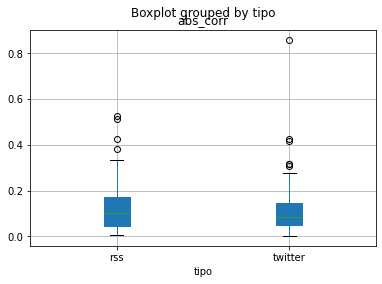

In [153]:
df_corr_pet[df_corr_pet['cuenta']>=7].boxplot(column = 'abs_corr', by = 'tipo', patch_artist = True)

Text(0.5, 1.2, 'twitter_razuero')

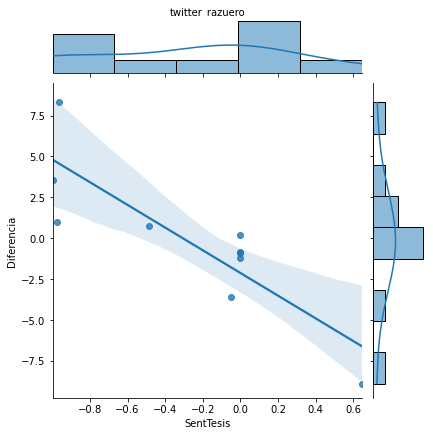

In [154]:
df_graf=df_base[df_base['id']=='twitter_razuero'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('twitter_razuero', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'twitter_JusTributaria')

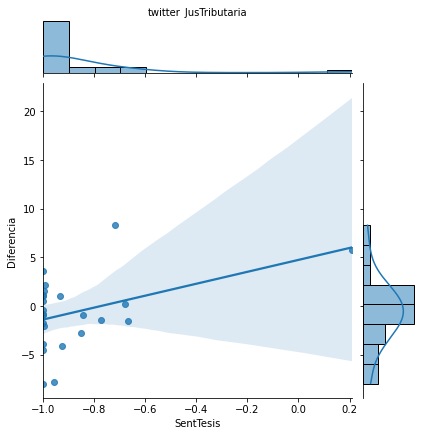

In [155]:
df_graf=df_base[df_base['id']=='twitter_JusTributaria'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('twitter_JusTributaria', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'twitter_amaldon19')

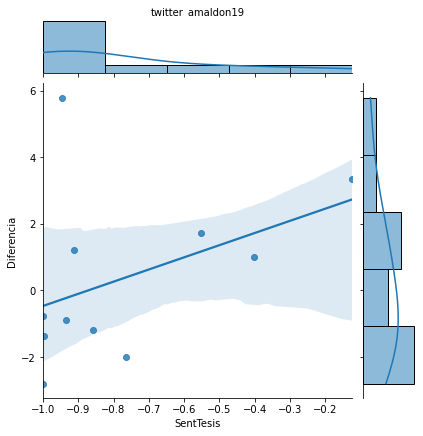

In [156]:
df_graf=df_base[df_base['id']=='twitter_amaldon19'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('twitter_amaldon19', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'twitter_Jllanosala')

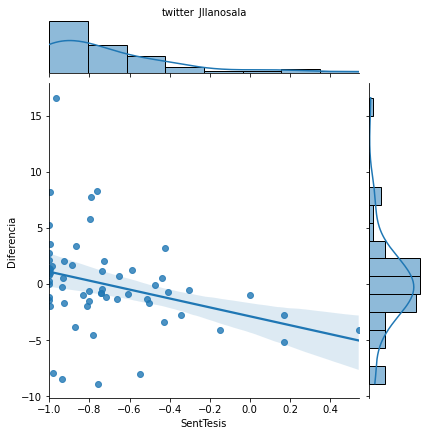

In [157]:
df_graf=df_base[df_base['id']=='twitter_Jllanosala'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('twitter_Jllanosala', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'the wall street journal Life Style')

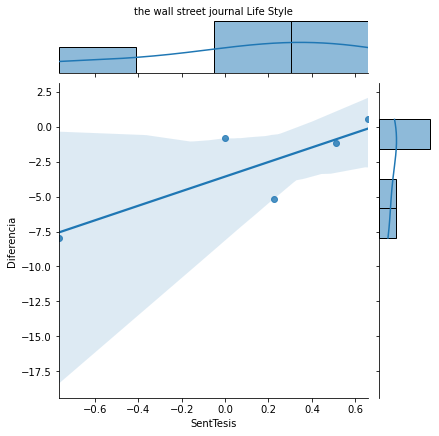

In [158]:
df_graf=df_base[df_base['id']=='rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('the wall street journal Life Style', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'Portafolio Ahorro')

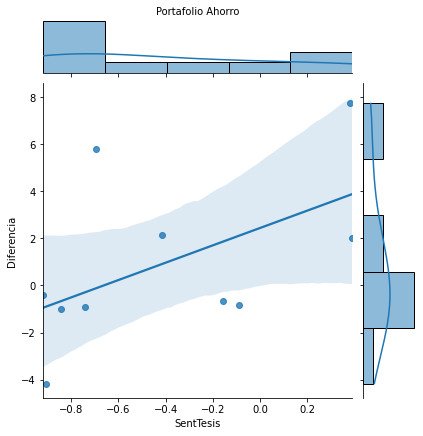

In [159]:
df_graf=df_base[df_base['id']=='rss_http://portafolio.co/rss/mis-finanzas/ahorro'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('Portafolio Ahorro', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'El Pais - Economía')

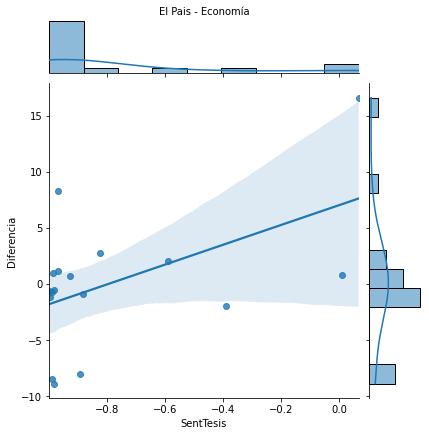

In [160]:
df_graf=df_base[df_base['id']=='rss_http://ep00.epimg.net/rss/economia/portada.xml'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('El Pais - Economía', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'Portafolio - Empresas')

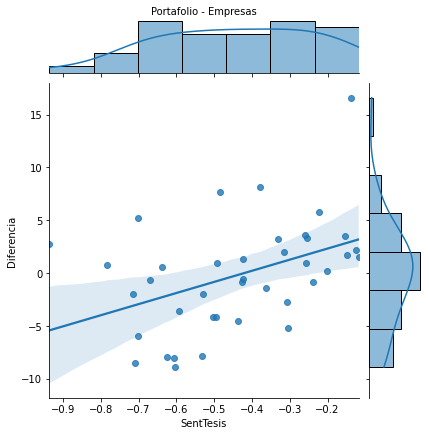

In [161]:
df_graf=df_base[df_base['id']=='rss_http://www.portafolio.co/rss/negocios/empresas'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('Portafolio - Empresas', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'Portafolio - Negocios')

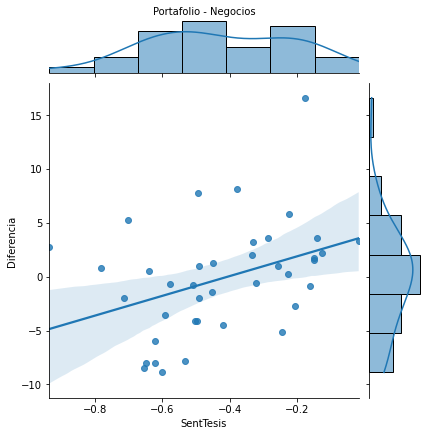

In [162]:
df_graf=df_base[df_base['id']=='rss_http://www.portafolio.co/rss/negocios'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('Portafolio - Negocios', y=1.2, fontsize = 10)

In [163]:
#guardar Resultado para comparación
res_corr_petroleo=res_resultados.copy()

In [164]:
res_resultados.to_csv('2.RESULTADOS/resultados_corr_petroleo.csv')

### Regresión Multilineal  (nuevo Script para no afectar librerias)
#### Preprocesamiento de la información

In [165]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,-1.21,twitter,twitter_Adcamach
1,Adcamach,2022-01-11,0.365000,-0.85,twitter,twitter_Adcamach
2,Adcamach,2022-01-12,-0.978000,0.03,twitter,twitter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-1.37,twitter,twitter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-0.11,twitter,twitter_Adcamach
...,...,...,...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333,1.55,rss,rss_https://www.eltiempo.com/rss/politica.xml
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000,5.79,rss,rss_https://www.eltiempo.com/rss/politica.xml
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333,0.98,rss,rss_https://www.eltiempo.com/rss/politica.xml
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,-1.43,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [166]:
df_base_pivot=pd.pivot_table(df_base, values=['SentTesis'], index=['date'], columns=['id'])

In [167]:
df_base_pivot=df_base_pivot.droplevel(0, axis='columns')

In [168]:
df_base_pivot.fillna(0,inplace=True)

In [169]:
df_base_pivot=df_base_pivot.merge(petroleo_df[['date','Diferencia']], left_index=True, right_on=['date'], how='left')

In [170]:
df_base_pivot.set_index('date', inplace=True)

In [171]:
df_base_pivot

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.793750,0.00000,0.000000,1.37
2021-12-31,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.811500,0.00000,0.000000,-1.01
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.00000,0.000000,-1.14
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.21
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.00000,0.000000,-1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,-0.798600,0.000,0.679200,0.097250,-0.318000,-0.174286,-0.141000,0.219250,-0.513000,-0.153500,...,0.000,0.000,-0.445250,-0.531971,-0.494500,-0.539591,-0.468714,-0.66075,0.356000,1.55
2022-04-05,-0.496258,0.000,0.106250,-0.062000,0.389714,-0.452111,-0.056333,0.042391,-0.486111,0.367667,...,-0.669,0.000,-0.548857,-0.485640,-0.463833,-0.496900,-0.335000,-0.99800,0.395250,5.79
2022-04-06,-0.454767,-0.987,-0.322667,0.098114,-0.209667,-0.354214,0.130000,-0.209111,-0.082806,-0.012250,...,-0.982,0.000,-0.341200,-0.556240,-0.574667,-0.459125,-0.836000,0.00000,0.292583,0.98


In [172]:
df_base_pivot.to_csv('2.RESULTADOS/base_reg_petroleo.csv')

## ORO

In [173]:
oro_df.dtypes

Indice        int64
Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
año           int64
mes          object
dia           int64
mesNum        int64
fecha        object
dtype: object

In [174]:
#oro_df['valor']=np.where(oro_df['DCOILBRENTEU']=='.',0,oro_df['DCOILBRENTEU'])

In [175]:
oro_df

,Indice,Date,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,fecha
0,1145,"Oct 06, 2017",1261.80,1261.80,1261.80,1261.80,-,9.57%,2017,Oct,6,10,2017-10-06
1,1144,"Oct 09, 2017",1278.75,1278.75,1278.75,1278.75,-,1.34%,2017,Oct,9,10,2017-10-09
2,1143,"Oct 10, 2017",1291.40,1291.40,1291.40,1291.40,-,0.99%,2017,Oct,10,10,2017-10-10
3,1142,"Oct 11, 2017",1289.25,1289.25,1289.25,1289.25,-,-0.17%,2017,Oct,11,10,2017-10-11
4,1141,"Oct 12, 2017",1290.25,1290.25,1290.25,1290.25,-,0.08%,2017,Oct,12,10,2017-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13


In [176]:
oro_df['Price']=oro_df['Price'].astype(float)

In [177]:
oro_df=oro_df[oro_df['Price']!=0]

In [178]:
#cortar periodo
oro_df=oro_df[oro_df['fecha']>='2021-12-30']

In [179]:
oro_df

,Indice,Date,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,fecha
1070,75,"Dec 30, 2021",1805.85,1805.85,1805.85,1805.85,-,0.65%,2021,Dec,30,12,2021-12-30
1071,74,"Dec 31, 2021",1820.10,1820.10,1820.10,1820.10,-,0.79%,2021,Dec,31,12,2021-12-31
1072,73,"Jan 04, 2022",1811.40,1811.40,1811.40,1811.40,-,-0.48%,2022,Jan,4,1,2022-01-04
1073,72,"Jan 05, 2022",1826.25,1826.25,1826.25,1826.25,-,0.82%,2022,Jan,5,1,2022-01-05
1074,71,"Jan 06, 2022",1789.35,1789.35,1789.35,1789.35,-,-2.02%,2022,Jan,6,1,2022-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13


In [180]:
oro_df['date_fin']=oro_df['fecha'].shift(periods=-1)

In [181]:
oro_df['Diferencia']=oro_df['Price'].diff(-1)

In [182]:
oro_df.rename(columns={'Date':'date_old','fecha':'date'}, inplace=True)

In [183]:
oro_df

,Indice,date_old,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,date,date_fin,Diferencia
1070,75,"Dec 30, 2021",1805.85,1805.85,1805.85,1805.85,-,0.65%,2021,Dec,30,12,2021-12-30,2021-12-31,-14.25
1071,74,"Dec 31, 2021",1820.10,1820.10,1820.10,1820.10,-,0.79%,2021,Dec,31,12,2021-12-31,2022-01-04,8.70
1072,73,"Jan 04, 2022",1811.40,1811.40,1811.40,1811.40,-,-0.48%,2022,Jan,4,1,2022-01-04,2022-01-05,-14.85
1073,72,"Jan 05, 2022",1826.25,1826.25,1826.25,1826.25,-,0.82%,2022,Jan,5,1,2022-01-05,2022-01-06,36.90
1074,71,"Jan 06, 2022",1789.35,1789.35,1789.35,1789.35,-,-2.02%,2022,Jan,6,1,2022-01-06,2022-01-07,-3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08,2022-04-11,-10.15
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11,2022-04-12,-9.30
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12,2022-04-13,-15.90
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13,2022-04-14,13.50


In [184]:
oro_df

,Indice,date_old,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,date,date_fin,Diferencia
1070,75,"Dec 30, 2021",1805.85,1805.85,1805.85,1805.85,-,0.65%,2021,Dec,30,12,2021-12-30,2021-12-31,-14.25
1071,74,"Dec 31, 2021",1820.10,1820.10,1820.10,1820.10,-,0.79%,2021,Dec,31,12,2021-12-31,2022-01-04,8.70
1072,73,"Jan 04, 2022",1811.40,1811.40,1811.40,1811.40,-,-0.48%,2022,Jan,4,1,2022-01-04,2022-01-05,-14.85
1073,72,"Jan 05, 2022",1826.25,1826.25,1826.25,1826.25,-,0.82%,2022,Jan,5,1,2022-01-05,2022-01-06,36.90
1074,71,"Jan 06, 2022",1789.35,1789.35,1789.35,1789.35,-,-2.02%,2022,Jan,6,1,2022-01-06,2022-01-07,-3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08,2022-04-11,-10.15
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11,2022-04-12,-9.30
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12,2022-04-13,-15.90
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13,2022-04-14,13.50


In [185]:
## aqui voy

In [186]:
#Make the db in memory
conn = sqlite3.connect(':memory:')

In [187]:
#write the tables
oro_df.to_sql('oro_df', conn, index=False)
tweeter_dframe.to_sql('tweeter_dframe', conn, index=False)
rss_dframe.to_sql('rss_dframe', conn, index=False)

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [188]:
qry = '''
    select  tweeter_dframe.*, oro_df.date, oro_df.date_fin
    from tweeter_dframe  left join  oro_df  
        on tweeter_dframe.created_at >= oro_df.date and 
        tweeter_dframe.created_at < oro_df.date_fin        
    '''

In [189]:
tweeter_dframe_new=pd.read_sql_query(qry, conn)

In [190]:
qry = '''
    select  rss_dframe.*, oro_df.date, oro_df.date_fin
    from rss_dframe  left join  oro_df  
        on rss_dframe.date_rss >= oro_df.date and 
        rss_dframe.date_rss < oro_df.date_fin        
    '''

In [191]:
rss_dframe_new=pd.read_sql_query(qry, conn)

In [192]:
tweeter_dframe_new.dtypes

index                 int64
id                    int64
created_at           object
lang                 object
id_fuente            object
full_text_Limpio     object
SentSQDM            float64
SentTesis           float64
date                 object
date_fin             object
dtype: object

In [193]:
rss_dframe_new.dtypes

index               int64
fuenteRss          object
idP                object
date_rss           object
lang               object
texto_Limpio       object
polaridad         float64
polaridad_SQDM    float64
date               object
date_fin           object
dtype: object

In [194]:
conn.close()

In [195]:
tweeter_dframe_new

,index,id,created_at,lang,id_fuente,full_text_Limpio,SentSQDM,SentTesis,date,date_fin
0,56,1476344656724176896,2021-12-30 00:09:29,es,sergiodigra,toda nuestra solidaridad,-0.252000,-0.252000,2021-12-30,2021-12-31
1,5363,1476349565154603010,2021-12-30 00:29:00,en,JavierMejiaC,i think the main problem when discussing inequality is that it framed as something independent of any other social outcome ansary brings an interesting view when discussing the ummayad caliphate you like social stability but that tends to bring inequality,0.647000,0.647000,2021-12-30,2021-12-31
2,5596,1476355915234349061,2021-12-30 00:54:14,es,Jllanosala,lo del pot por decreto es una incoherencia inmensa pero la pregunta realmente importante es si es un buen pot mucho mejor que el que hundió el concejo en la administración anterior lo dejo como pregunta abierta bienvenidos sus comentarios,-1.000000,-1.000000,2021-12-30,2021-12-31
3,99,1476356746935472128,2021-12-30 00:57:32,es,sergiodigra,rt nos solidarizamos con ante los efectos de sismo ocurrido en la zona de amazonas que ha ocasionado considerables daños,-0.926000,-0.926000,2021-12-30,2021-12-31
4,5858,1476372840886808579,2021-12-30 02:01:29,es,JorgeATovar,excelente el ejercicio del dane después de corea del sur colombia es el primer país que las implementa oficialmente las primeras estimaciones para el país las hicimos con un orgullo que el dane tome el testigo,-0.472661,-0.443868,2021-12-30,2021-12-31
...,...,...,...,...,...,...,...,...,...,...
136168,2501,1516382895924920320,2022-04-19 11:47:10,es,rcnmundo,las cuentas de psg para ser campeón de liga las cuatro bajas que tendrá el miércoles,-0.950000,-0.950000,None,None
136169,1900,1516383126951534594,2022-04-19 11:48:05,ro,lafm,editorial de parte,-0.112000,-0.112000,None,None
136170,2500,1516383244475723779,2022-04-19 11:48:33,es,rcnmundo,ciudadanos se unen la búsqueda de homicidas del policía en cartagena,-0.409000,-0.409000,None,None
136171,4900,1516383583014998021,2022-04-19 11:49:53,es,freddykastro,rt historias como la de diego león marín nos inspiran él es un comerciante de medellín que recibe pagos digitales que pie,-0.905000,-0.905000,None,None


In [196]:
rss_dframe_new

,index,fuenteRss,idP,date_rss,lang,texto_Limpio,polaridad,polaridad_SQDM,date,date_fin
0,39,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/14/mis_derechos/1642157881_085466.html#?ref=rss&format=simple&link=guid,2022-01-14 11:53:08,esp,caso djokovic cómo se castiga en españa quien falsifica las pruebas covid independientemente de las multas que pueden imponer las diferentes administraciones los hechos podrían ser delito,-0.999113,-0.994654,2022-01-14,2022-01-17
1,40,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/07/mis_derechos/1641564709_987707.html#?ref=rss&format=simple&link=guid,2022-01-08 09:49:12,esp,guía para las rebajas derecho de devolución garantía pago con datos personales expertas en consumo explican qué facultades asisten los ciudadanos las novedades legislativas que entran en vigor este año,-0.926199,-0.993272,2022-01-07,2022-01-10
2,0,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/mundo/unidos-tomo-rehenes-sinagoga-pedir-liberen-hermana-condenada-intentar-matar-soldados-afganistan_0_0Zb8XVHxL.html,2022-01-15 23:17:45,esp,estados unidos tomó rehenes en una sinagoga para pedir que liberen su hermana condenada por intentar matar soldados en afganistán ocurre en texas el fbi rodea la zona hay cuatro personas retenidas entre ellas el rabino,-0.982426,-0.998816,2022-01-14,2022-01-17
3,1,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/opinion/papelon-nicaragua-buscar-unidos-mano_0_VkDEQc4UR.html,2022-01-15 23:16:21,esp,del papelón en nicaragua buscar que estados unidos nos dé una mano cafiero se prueba el traje de canciller fernández se plancha el suyo para ver putin xi jinping,-0.872621,-0.989364,2022-01-14,2022-01-17
4,2,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/economia/-edesur-apagando-incendios-necesitamos-estabilidad-poder-planificar-_0_TOH2_j5Gy.html,2022-01-15 23:10:21,esp,en edesur estamos apagando incendios necesitamos estabilidad para poder planificar claudio cunha ceo de la distribuidora explica las razones de los cortes de los últimos días hace autocrítica pide disculpas pero reclama reglas del juego claras estables que no dependan de decisiones políticas,-0.907343,-0.999999,2022-01-14,2022-01-17
...,...,...,...,...,...,...,...,...,...,...
40030,5,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/turismo-razones-de-la-fuerte-reactivacion-de-viajes-y-hoteles-en-colombia-665572,2022-04-18 16:35:13,esp,el sector turismo colombiano pasa del rezago consolidar su recuperación oferta de sillas de colombianos que salen al exterior ya retornó nbsp los niveles de la prepandemia,0.827000,-0.913000,None,None
40031,6,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/china-impacto-del-confinamiento-en-shanghai-para-la-economia-665786,2022-04-18 12:53:26,esp,economía china crece en primer trimestre las restricciones sanitarias en algunas ciudades afectaron las cifras de comercio de empleo nbsp,-0.928000,-0.956000,None,None
40032,7,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/como-favoreceria-a-colombia-la-venta-de-petroleo-a-estados-unidos-665777,2022-04-18 12:31:17,esp,así favorecería colombia la venta de petróleo estados unidos la intención del gobierno es subir la producción barriles diarios en un año nbsp,-0.365000,-0.505000,None,None
40033,8,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/los-vientos-de-recesion-que-soplan-con-fuerza-en-reunion-del-fmi-665564,2022-04-18 12:15:47,esp,los riesgos siguen al alza análisis de ricardo ávila en un mundo con fuertes vientos de recesión colombia le puede ir mejor que la mayoría,-0.968000,-0.732000,None,None


In [197]:
tweeter_df_res=tweeter_dframe_new.groupby(['id_fuente','date'])[['SentTesis']].mean().reset_index()
tweeter_df_res['date']=pd.to_datetime(tweeter_df_res['date'])
tweeter_df_res

,id_fuente,date,SentTesis
0,Adcamach,2022-01-04,-0.306333
1,Adcamach,2022-01-11,0.365000
2,Adcamach,2022-01-12,-0.978000
3,Adcamach,2022-01-13,-0.996667
4,Adcamach,2022-01-19,-0.008500
...,...,...,...
3955,wef,2022-04-07,0.240417
3956,wef,2022-04-08,0.159167
3957,wef,2022-04-11,0.198333
3958,wef,2022-04-12,0.355000


In [198]:
tweeter_df_res.dtypes

id_fuente            object
date         datetime64[ns]
SentTesis           float64
dtype: object

In [199]:
rss_df_res=rss_dframe_new.groupby(['fuenteRss','date'])[['polaridad']].mean().reset_index()
rss_df_res['date']=pd.to_datetime(rss_df_res['date'])
rss_df_res

,fuenteRss,date,polaridad
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533
...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111


In [200]:
oro_df[['date','Diferencia']]

,date,Diferencia
1070,2021-12-30,-14.25
1071,2021-12-31,8.70
1072,2022-01-04,-14.85
1073,2022-01-05,36.90
1074,2022-01-06,-3.25
...,...,...
1140,2022-04-08,-10.15
1141,2022-04-11,-9.30
1142,2022-04-12,-15.90
1143,2022-04-13,13.50


In [201]:
oro_df.dtypes

Indice          int64
date_old       object
Price         float64
Open          float64
High          float64
Low           float64
Vol.           object
Change %       object
año             int64
mes            object
dia             int64
mesNum          int64
date           object
date_fin       object
Diferencia    float64
dtype: object

In [202]:
oro_df['date']=pd.to_datetime(oro_df['date'])

In [203]:
tweeter_df_base=tweeter_df_res.merge(oro_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
tweeter_df_base

,id_fuente,date,SentTesis,Diferencia
0,Adcamach,2022-01-04,-0.306333,-14.85
1,Adcamach,2022-01-11,0.365000,-14.60
2,Adcamach,2022-01-12,-0.978000,1.05
3,Adcamach,2022-01-13,-0.996667,-2.60
4,Adcamach,2022-01-19,-0.008500,-18.40
...,...,...,...,...
3955,wef,2022-04-07,0.240417,-9.00
3956,wef,2022-04-08,0.159167,-10.15
3957,wef,2022-04-11,0.198333,-9.30
3958,wef,2022-04-12,0.355000,-15.90


In [204]:
tweeter_df_base['tipo']='twitter'

In [205]:
rss_df_base=rss_df_res.merge(oro_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
rss_df_base.columns=['id_fuente','date','SentTesis','Diferencia']
rss_df_base['tipo']='rss'
rss_df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382,5.10,rss
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700,-7.10,rss
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733,17.60,rss
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265,-14.05,rss
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533,-30.85,rss
...,...,...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,-9.00,rss
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,-10.15,rss
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-9.30,rss
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-15.90,rss


In [206]:
df_base=tweeter_df_base.append(rss_df_base)

In [207]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,Adcamach,2022-01-04,-0.306333,-14.85,twitter
1,Adcamach,2022-01-11,0.365000,-14.60,twitter
2,Adcamach,2022-01-12,-0.978000,1.05,twitter
3,Adcamach,2022-01-13,-0.996667,-2.60,twitter
4,Adcamach,2022-01-19,-0.008500,-18.40,twitter
...,...,...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,-9.00,rss
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,-10.15,rss
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-9.30,rss
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-15.90,rss


In [208]:
df_base['id']=df_base["tipo"] + '_'+ df_base["id_fuente"]

In [209]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,-14.85,twitter,twitter_Adcamach
1,Adcamach,2022-01-11,0.365000,-14.60,twitter,twitter_Adcamach
2,Adcamach,2022-01-12,-0.978000,1.05,twitter,twitter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-2.60,twitter,twitter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-18.40,twitter,twitter_Adcamach
...,...,...,...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,-9.00,rss,rss_https://www.eltiempo.com/rss/politica.xml
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,-10.15,rss,rss_https://www.eltiempo.com/rss/politica.xml
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-9.30,rss,rss_https://www.eltiempo.com/rss/politica.xml
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-15.90,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [210]:
#pd.pivot_table(tweeter_df_res, values=[])

In [211]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.2.post1


In [212]:
df_base.to_csv('2.RESULTADOS/resultados_base_oro.csv')

### Recopilación resultados

In [213]:
resultados_df=df_base[['id']].value_counts().to_frame().reset_index()

In [214]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr()

In [215]:
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [216]:
res_resultados=resultados_df.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr']

In [217]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='pearson')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [218]:
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson']

In [219]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='kendall')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall
0,twitter_MantillaIgnacio,73,-0.164284,-0.164284,-0.122931
1,twitter_BancoRepublica,73,-0.207368,-0.207368,-0.096326
2,twitter_NASA,72,0.033665,0.033665,0.059088
3,twitter_Fondosdepension,71,-0.064374,-0.064374,-0.012490
4,twitter_ecofeminita,71,-0.038067,-0.038067,-0.050383
...,...,...,...,...,...
161,twitter_alhosu,6,0.188896,0.188896,0.066667
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.209037,0.209037,0.400000
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000
164,twitter_jscorrales,1,NaN,NaN,NaN


In [220]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='spearman')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall','corrSpearman']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
0,twitter_MantillaIgnacio,73,-0.164284,-0.164284,-0.122931,-0.183113
1,twitter_BancoRepublica,73,-0.207368,-0.207368,-0.096326,-0.150364
2,twitter_NASA,72,0.033665,0.033665,0.059088,0.081244
3,twitter_Fondosdepension,71,-0.064374,-0.064374,-0.012490,-0.035985
4,twitter_ecofeminita,71,-0.038067,-0.038067,-0.050383,-0.077909
...,...,...,...,...,...,...
161,twitter_alhosu,6,0.188896,0.188896,0.066667,0.142857
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.209037,0.209037,0.400000,0.500000
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,1.000000
164,twitter_jscorrales,1,NaN,NaN,NaN,NaN


In [221]:
res_resultados.sort_values('corrSpearman').head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
157,twitter_razuero,11,-0.287986,-0.287986,-0.404520,-0.488504
124,rss_http://feeds.washingtonpost.com/rss/rss_morning-mix,40,-0.420298,-0.420298,-0.279487,-0.401313
151,rss_http://portafolio.co/rss/tendencias/sociales,16,-0.332622,-0.332622,-0.266667,-0.394118
150,rss_http://portafolio.co/rss/negocios/inversion,16,-0.225317,-0.225317,-0.283333,-0.385294
48,twitter_castellanosgd,50,-0.327554,-0.327554,-0.265661,-0.384893
155,rss_https://www.eltiempo.com/rss/mundo_africa.xml,12,-0.157896,-0.157896,-0.242424,-0.384615
28,rss_http://www.nytimes.com/services/xml/rss/nyt/Science.xml,60,-0.256757,-0.256757,-0.231139,-0.344906
137,twitter_mpapell,24,-0.281601,-0.281601,-0.173913,-0.307826
132,twitter_Fedesarrollo,30,-0.227568,-0.227568,-0.179517,-0.292802
33,twitter_RodLuisAlberto,57,-0.233582,-0.233582,-0.163790,-0.256215


In [222]:
res_resultados.sort_values('corrSpearman',ascending=False).head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,1.000000
159,twitter_jagallegod,10,0.702485,0.702485,0.629253,0.826752
153,rss_http://www.portafolio.co/rss/economia/impuestos,13,0.404381,0.404381,0.477429,0.685008
158,rss_http://portafolio.co/rss/mis-finanzas/ahorro,10,0.456582,0.456582,0.377778,0.503030
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.209037,0.209037,0.400000,0.500000
70,twitter_NoticiasRCN,44,0.323271,0.323271,0.302326,0.452008
160,rss_http://feeds.washingtonpost.com/rss/rss_innovations,7,0.300175,0.300175,0.238095,0.428571
138,twitter_FocoEconomico,24,0.275451,0.275451,0.217391,0.306087
93,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,42,0.215707,0.215707,0.186992,0.289199
145,rss_http://feeds.washingtonpost.com/rss/rss_fact-checker,20,0.243604,0.243604,0.206903,0.270982


In [223]:
res_resultados['tipo']=np.where(res_resultados['id'].str[0]=='t','twitter','rss')

In [224]:
df_corr_oro=res_resultados.copy()

In [225]:
df_corr_oro=df_corr_oro.drop(columns=['corr'])
df_corr_oro=df_corr_oro[df_corr_oro['corrPearson'].notnull()]

In [226]:
df_corr_oro['abs_corr']=df_corr_oro['corrPearson'].abs()
df_corr_oro=df_corr_oro.sort_values('abs_corr', ascending=False)

In [227]:
df_corr_oro[df_corr_oro['tipo']=='twitter'].head(10)

,id,cuenta,corrPearson,corrKendall,corrSpearman,tipo,abs_corr
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,twitter,1.000000
159,twitter_jagallegod,10,0.702485,0.629253,0.826752,twitter,0.702485
133,twitter_MelendezMarcela,26,-0.393928,-0.095977,-0.136185,twitter,0.393928
41,twitter_rchicave,55,-0.361262,-0.133378,-0.174787,twitter,0.361262
22,twitter_Jllanosala,62,-0.359928,-0.149791,-0.223278,twitter,0.359928
48,twitter_castellanosgd,50,-0.327554,-0.265661,-0.384893,twitter,0.327554
70,twitter_NoticiasRCN,44,0.323271,0.302326,0.452008,twitter,0.323271
157,twitter_razuero,11,-0.287986,-0.404520,-0.488504,twitter,0.287986
137,twitter_mpapell,24,-0.281601,-0.173913,-0.307826,twitter,0.281601
143,twitter_Adcamach,21,0.281095,0.157518,0.198116,twitter,0.281095


In [228]:
df_corr_oro[df_corr_oro['tipo']=='rss'].head(10)

,id,cuenta,corrPearson,corrKendall,corrSpearman,tipo,abs_corr
146,rss_http://ep00.epimg.net/rss/economia/portada.xml,18,0.527985,0.198030,0.269768,rss,0.527985
158,rss_http://portafolio.co/rss/mis-finanzas/ahorro,10,0.456582,0.377778,0.503030,rss,0.456582
149,rss_http://rss.cnn.com/rss/edition_world.rss,16,-0.425653,-0.175734,-0.239882,rss,0.425653
124,rss_http://feeds.washingtonpost.com/rss/rss_morning-mix,40,-0.420298,-0.279487,-0.401313,rss,0.420298
153,rss_http://www.portafolio.co/rss/economia/impuestos,13,0.404381,0.477429,0.685008,rss,0.404381
151,rss_http://portafolio.co/rss/tendencias/sociales,16,-0.332622,-0.266667,-0.394118,rss,0.332622
160,rss_http://feeds.washingtonpost.com/rss/rss_innovations,7,0.300175,0.238095,0.428571,rss,0.300175
71,rss_http://feeds.washingtonpost.com/rss/national,44,-0.292959,-0.167019,-0.231853,rss,0.292959
129,rss_http://feeds.washingtonpost.com/rss/rss_monkey-cage,38,0.264213,0.123755,0.170369,rss,0.264213
28,rss_http://www.nytimes.com/services/xml/rss/nyt/Science.xml,60,-0.256757,-0.231139,-0.344906,rss,0.256757


In [229]:
df_corr_trm

,id,cuenta,corrPearson,corrKendall,corrSpearman,tipo,abs_corr
163,twitter_NoelMllr,2,-1.000000,-1.000000,-1.000000,twitter,1.000000
161,twitter_alhosu,6,0.821835,0.466667,0.542857,twitter,0.821835
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.600000,-0.700000,rss,0.454443
154,twitter_amaldon19,12,0.439894,0.351155,0.483363,twitter,0.439894
158,twitter_jagallegod,10,0.395240,0.224733,0.297874,twitter,0.395240
...,...,...,...,...,...,...,...
146,rss_http://ep00.epimg.net/rss/economia/portada.xml,18,-0.006890,-0.052808,-0.042377,rss,0.006890
117,twitter_MauricioCard,39,-0.004275,0.000000,0.022673,twitter,0.004275
53,rss_http://www.eltiempo.com/rss/mundo_asia.xml,46,-0.002304,0.026112,0.040521,rss,0.002304
72,rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml,42,-0.001541,-0.012791,0.003160,rss,0.001541


<AxesSubplot:title={'center':'abs_corr'}, xlabel='tipo'>

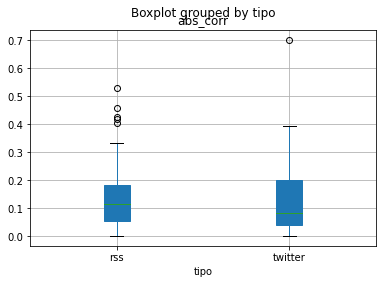

In [230]:
df_corr_oro[df_corr_oro['cuenta']>=7].boxplot(column = 'abs_corr', by = 'tipo', patch_artist = True)

Text(0.5, 1.2, 'twitter_jagallegod')

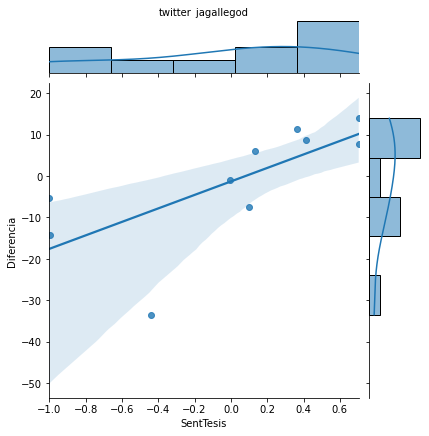

In [231]:
df_graf=df_base[df_base['id']=='twitter_jagallegod'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('twitter_jagallegod', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'twitter_MelendezMarcela')

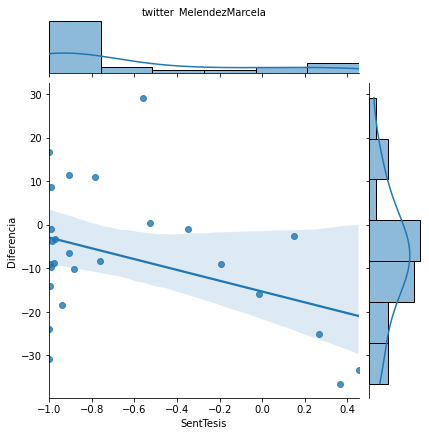

In [232]:
df_graf=df_base[df_base['id']=='twitter_MelendezMarcela'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('twitter_MelendezMarcela', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'twitter_rchicave')

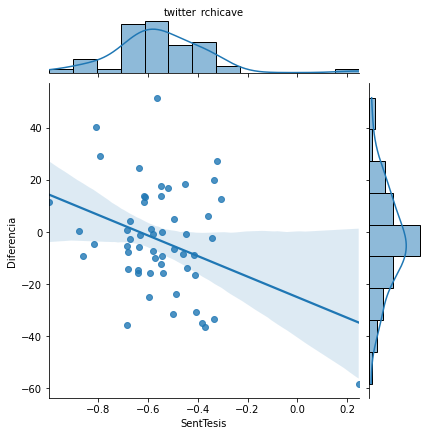

In [233]:
df_graf=df_base[df_base['id']=='twitter_rchicave'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('twitter_rchicave', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'twitter_Jllanosala')

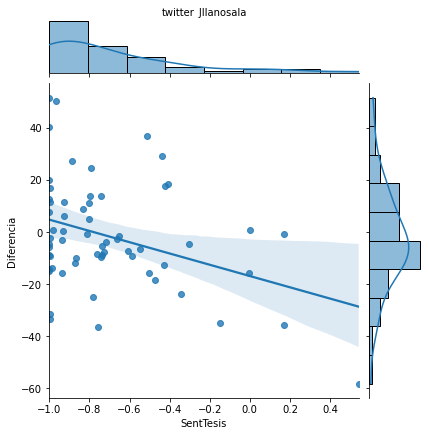

In [234]:
df_graf=df_base[df_base['id']=='twitter_Jllanosala'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('twitter_Jllanosala', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'twitter_castellanosgd')

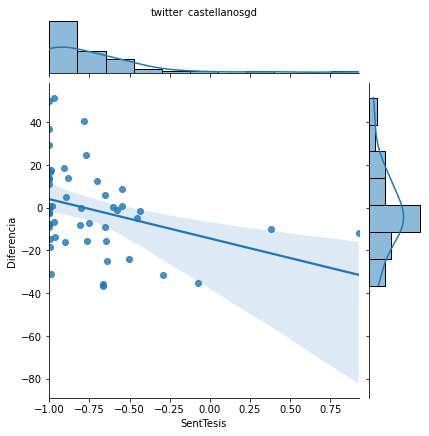

In [235]:
df_graf=df_base[df_base['id']=='twitter_castellanosgd'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('twitter_castellanosgd', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'El Pais - Economía')

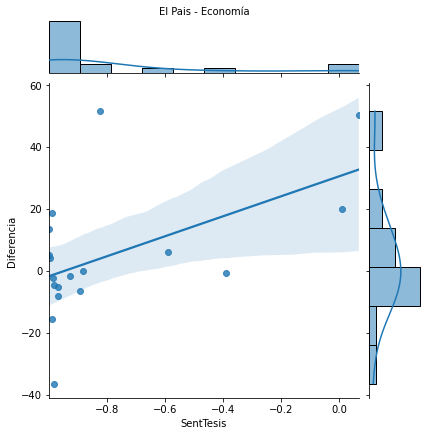

In [236]:
df_graf=df_base[df_base['id']=='rss_http://ep00.epimg.net/rss/economia/portada.xml'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('El Pais - Economía', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'Portafolio - Finanzas Ahorro')

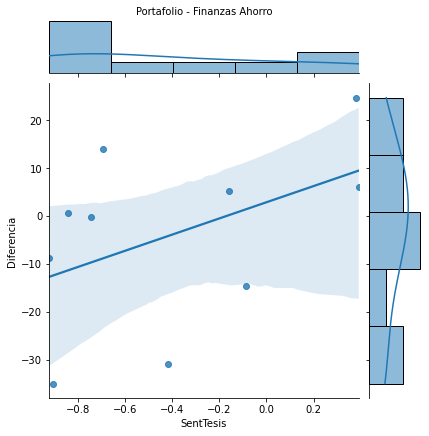

In [237]:
df_graf=df_base[df_base['id']=='rss_http://portafolio.co/rss/mis-finanzas/ahorro'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('Portafolio - Finanzas Ahorro', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'CNN - Mundo')

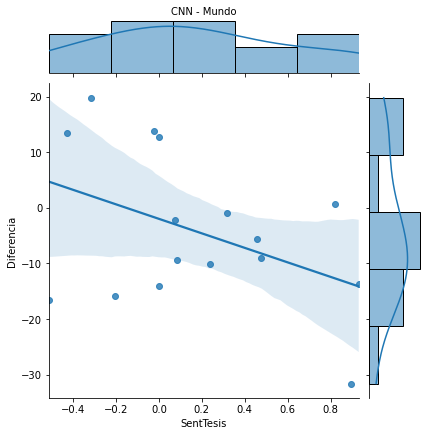

In [238]:
df_graf=df_base[df_base['id']=='rss_http://rss.cnn.com/rss/edition_world.rss'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('CNN - Mundo', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'WashingtonPost - Info Mañana')

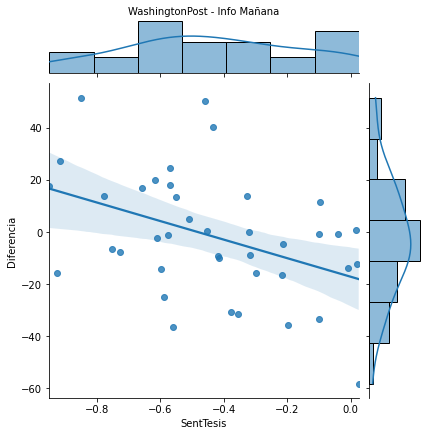

In [239]:
df_graf=df_base[df_base['id']=='rss_http://feeds.washingtonpost.com/rss/rss_morning-mix'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('WashingtonPost - Info Mañana', y=1.2, fontsize = 10)

Text(0.5, 1.2, 'Portafolio - Econimia - impuestos')

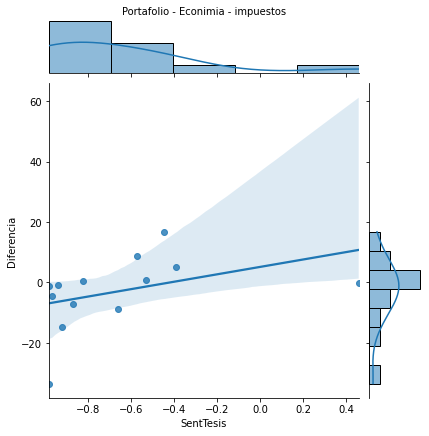

In [240]:
df_graf=df_base[df_base['id']=='rss_http://www.portafolio.co/rss/economia/impuestos'][['SentTesis','Diferencia']]
ax=sns.jointplot(x=df_graf['SentTesis'],y=df_graf['Diferencia'],data=df_graf,kind='reg')
plt.title('Portafolio - Econimia - impuestos', y=1.2, fontsize = 10)

In [241]:
#guardar Resultado para comparación
res_corr_oro=res_resultados.copy()

In [242]:
res_resultados.to_csv('2.RESULTADOS/resultados_corr_oro.csv')

### Regresión Multilineal  (nuevo Script para no afectar librerias)
#### Preprocesamiento de la información

In [243]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,-14.85,twitter,twitter_Adcamach
1,Adcamach,2022-01-11,0.365000,-14.60,twitter,twitter_Adcamach
2,Adcamach,2022-01-12,-0.978000,1.05,twitter,twitter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-2.60,twitter,twitter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-18.40,twitter,twitter_Adcamach
...,...,...,...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,-9.00,rss,rss_https://www.eltiempo.com/rss/politica.xml
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,-10.15,rss,rss_https://www.eltiempo.com/rss/politica.xml
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-9.30,rss,rss_https://www.eltiempo.com/rss/politica.xml
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-15.90,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [244]:
df_base_pivot=pd.pivot_table(df_base, values=['SentTesis'], index=['date'], columns=['id'])

In [245]:
df_base_pivot=df_base_pivot.droplevel(0, axis='columns')

In [246]:
df_base_pivot.fillna(0,inplace=True)

In [247]:
df_base_pivot=df_base_pivot.merge(oro_df[['date','Diferencia']], left_index=True, right_on=['date'], how='left')

In [248]:
df_base_pivot.set_index('date', inplace=True)

In [249]:
df_base_pivot

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.793750,0.000000,0.000000,-14.25
2021-12-31,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.776667,0.000000,0.000000,8.70
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.85
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000,36.90
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000,-3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417,-9.00
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167,-10.15
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333,-9.30


In [250]:
df_base_pivot.to_csv('2.RESULTADOS/base_reg_oro.csv')

# Comparación resultados correlaciones

In [252]:
res_corr_trm

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman,tipo
0,twitter_BancoRepublica,70,-0.092414,-0.092414,-0.075010,-0.131148,twitter
1,twitter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729,-0.114142,twitter
2,twitter_NASA,68,0.293938,0.293938,0.166008,0.241273,twitter
3,twitter_Fondosdepension,68,-0.150526,-0.150526,-0.025928,-0.049855,twitter
4,twitter_ecofeminita,67,0.093343,0.093343,0.097893,0.157176,twitter
...,...,...,...,...,...,...,...
161,twitter_alhosu,6,0.821835,0.821835,0.466667,0.542857,twitter
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000,rss
163,twitter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000,twitter
164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter


In [253]:
res_corr_trm.columns=['id', 't_cuenta', 't_corr', 't_corrPearson', 't_corrKendall', 't_corrSpearman','t_tipo']
res_corr_petroleo.columns=['id', 'p_cuenta', 'p_corr', 'p_corrPearson', 'p_corrKendall', 'p_corrSpearman','p_tipo']
res_corr_oro.columns=['id', 'o_cuenta', 'o_corr', 'o_corrPearson', 'o_corrKendall', 'o_corrSpearman','o_tipo']

In [254]:
res_corr_trm

,id,t_cuenta,t_corr,t_corrPearson,t_corrKendall,t_corrSpearman,t_tipo
0,twitter_BancoRepublica,70,-0.092414,-0.092414,-0.075010,-0.131148,twitter
1,twitter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729,-0.114142,twitter
2,twitter_NASA,68,0.293938,0.293938,0.166008,0.241273,twitter
3,twitter_Fondosdepension,68,-0.150526,-0.150526,-0.025928,-0.049855,twitter
4,twitter_ecofeminita,67,0.093343,0.093343,0.097893,0.157176,twitter
...,...,...,...,...,...,...,...
161,twitter_alhosu,6,0.821835,0.821835,0.466667,0.542857,twitter
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000,rss
163,twitter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000,twitter
164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter


In [255]:
res_corr_petroleo

,id,p_cuenta,p_corr,p_corrPearson,p_corrKendall,p_corrSpearman,p_tipo
0,twitter_MantillaIgnacio,71,-0.157514,-0.157514,-0.116345,-0.176478,twitter
1,twitter_BancoRepublica,71,-0.030168,-0.030168,-0.043093,-0.068882,twitter
2,twitter_NASA,69,-0.036942,-0.036942,-0.073758,-0.095817,twitter
3,twitter_ecofeminita,68,0.018170,0.018170,0.043975,0.061522,twitter
4,twitter_Fondosdepension,68,0.112003,0.112003,0.009670,0.011911,twitter
...,...,...,...,...,...,...,...
161,twitter_alhosu,6,0.441420,0.441420,0.466667,0.714286,twitter
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.826167,0.826167,0.600000,0.700000,rss
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,1.000000,twitter
164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter


In [256]:
res_corr_oro

,id,o_cuenta,o_corr,o_corrPearson,o_corrKendall,o_corrSpearman,o_tipo
0,twitter_MantillaIgnacio,73,-0.164284,-0.164284,-0.122931,-0.183113,twitter
1,twitter_BancoRepublica,73,-0.207368,-0.207368,-0.096326,-0.150364,twitter
2,twitter_NASA,72,0.033665,0.033665,0.059088,0.081244,twitter
3,twitter_Fondosdepension,71,-0.064374,-0.064374,-0.012490,-0.035985,twitter
4,twitter_ecofeminita,71,-0.038067,-0.038067,-0.050383,-0.077909,twitter
...,...,...,...,...,...,...,...
161,twitter_alhosu,6,0.188896,0.188896,0.066667,0.142857,twitter
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.209037,0.209037,0.400000,0.500000,rss
163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,1.000000,twitter
164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter


In [257]:
res_comp=res_corr_trm.merge(res_corr_petroleo,on='id',how='outer')
res_comp=res_comp.merge(res_corr_oro,on='id',how='outer')

In [258]:
res_comp

,id,t_cuenta,t_corr,t_corrPearson,t_corrKendall,t_corrSpearman,t_tipo,p_cuenta,p_corr,p_corrPearson,p_corrKendall,p_corrSpearman,p_tipo,o_cuenta,o_corr,o_corrPearson,o_corrKendall,o_corrSpearman,o_tipo
0,twitter_BancoRepublica,70,-0.092414,-0.092414,-0.075010,-0.131148,twitter,71,-0.030168,-0.030168,-0.043093,-0.068882,twitter,73,-0.207368,-0.207368,-0.096326,-0.150364,twitter
1,twitter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729,-0.114142,twitter,71,-0.157514,-0.157514,-0.116345,-0.176478,twitter,73,-0.164284,-0.164284,-0.122931,-0.183113,twitter
2,twitter_NASA,68,0.293938,0.293938,0.166008,0.241273,twitter,69,-0.036942,-0.036942,-0.073758,-0.095817,twitter,72,0.033665,0.033665,0.059088,0.081244,twitter
3,twitter_Fondosdepension,68,-0.150526,-0.150526,-0.025928,-0.049855,twitter,68,0.112003,0.112003,0.009670,0.011911,twitter,71,-0.064374,-0.064374,-0.012490,-0.035985,twitter
4,twitter_ecofeminita,67,0.093343,0.093343,0.097893,0.157176,twitter,68,0.018170,0.018170,0.043975,0.061522,twitter,71,-0.038067,-0.038067,-0.050383,-0.077909,twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,twitter_alhosu,6,0.821835,0.821835,0.466667,0.542857,twitter,6,0.441420,0.441420,0.466667,0.714286,twitter,6,0.188896,0.188896,0.066667,0.142857,twitter
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000,rss,5,0.826167,0.826167,0.600000,0.700000,rss,5,0.209037,0.209037,0.400000,0.500000,rss
163,twitter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000,twitter,2,1.000000,1.000000,1.000000,1.000000,twitter,2,1.000000,1.000000,1.000000,1.000000,twitter
164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter,1,NaN,NaN,NaN,NaN,twitter,1,NaN,NaN,NaN,NaN,twitter


In [259]:
res_comp.sort_values('t_corrPearson').sample(20)

,id,t_cuenta,t_corr,t_corrPearson,t_corrKendall,t_corrSpearman,t_tipo,p_cuenta,p_corr,p_corrPearson,p_corrKendall,p_corrSpearman,p_tipo,o_cuenta,o_corr,o_corrPearson,o_corrKendall,o_corrSpearman,o_tipo
14,twitter_Minvivienda,63,0.281415,0.281415,0.091212,0.128221,twitter,64,0.083662,0.083662,0.062531,0.083324,twitter,66,0.017192,0.017192,0.026586,0.025989,twitter
85,twitter_juanf_vargas,41,-0.141319,-0.141319,-0.070773,-0.099848,twitter,40,-0.315762,-0.315762,-0.145803,-0.225486,twitter,42,-0.183251,-0.183251,-0.100853,-0.127597,twitter
80,rss_http://www.portafolio.co/rss/economia/gobierno,42,0.043363,0.043363,0.122093,0.186224,rss,40,0.105907,0.105907,0.055164,0.095408,rss,43,-0.158123,-0.158123,-0.074197,-0.110994,rss
86,twitter_ELTIEMPO,41,-0.117202,-0.117202,-0.042709,-0.057058,twitter,40,-0.052644,-0.052644,-0.001283,-0.000375,twitter,43,0.089807,0.089807,0.076412,0.112655,twitter
24,twitter_Jllanosala,58,0.103450,0.103450,0.027921,0.034186,twitter,60,-0.318017,-0.318017,-0.252998,-0.382981,twitter,62,-0.359928,-0.359928,-0.149791,-0.223278,twitter
38,rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories,53,0.111058,0.111058,0.077733,0.109465,rss,53,-0.194375,-0.194375,-0.056686,-0.065843,rss,56,0.125898,0.125898,0.044849,0.062274,rss
98,twitter_CaracolRadio,40,0.156789,0.156789,0.062861,0.121488,twitter,39,-0.184766,-0.184766,-0.165992,-0.240081,twitter,42,-0.051322,-0.051322,-0.061556,-0.085487,twitter
22,twitter_Victor_Malagon,59,-0.041812,-0.041812,-0.062006,-0.087000,twitter,58,-0.182005,-0.182005,-0.124092,-0.198044,twitter,61,0.002477,0.002477,-0.041553,-0.074262,twitter
63,twitter_NTN24,43,-0.177496,-0.177496,-0.118625,-0.197010,twitter,42,-0.055460,-0.055460,-0.004648,0.006888,twitter,45,-0.134287,-0.134287,-0.088889,-0.133597,twitter
1,twitter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729,-0.114142,twitter,71,-0.157514,-0.157514,-0.116345,-0.176478,twitter,73,-0.164284,-0.164284,-0.122931,-0.183113,twitter


## Comparar indicadores entre ellos

In [260]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date,date_fin
1,31/12/2021,30/12/2021,3981.16,-42.52,5,jue,0,0,2021-12-30,2022-01-03
5,04/01/2022,03/01/2022,4082.75,101.59,2,lun,0,0,2022-01-03,2022-01-04
6,05/01/2022,04/01/2022,4084.11,1.36,3,mar,0,0,2022-01-04,2022-01-05
7,06/01/2022,05/01/2022,4042.36,-41.75,4,mié,0,0,2022-01-05,2022-01-06
8,07/01/2022,06/01/2022,4039.31,-3.05,5,jue,0,0,2022-01-06,2022-01-07
...,...,...,...,...,...,...,...,...,...,...
100,09/04/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08,2022-04-11
103,12/04/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11,2022-04-12
104,13/04/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12,2022-04-13
105,14/04/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13,2022-04-18


In [261]:
petroleo_df

,date,DCOILBRENTEU,valor,date_fin,Diferencia
1232,2021-12-30,78.61,78.61,2021-12-31,1.37
1233,2021-12-31,77.24,77.24,2022-01-03,-1.01
1234,2022-01-03,78.25,78.25,2022-01-04,-1.14
1235,2022-01-04,79.39,79.39,2022-01-05,-1.21
1236,2022-01-05,80.6,80.60,2022-01-06,-1.39
...,...,...,...,...,...
1300,2022-04-05,106.6,106.60,2022-04-06,5.79
1301,2022-04-06,100.81,100.81,2022-04-07,0.98
1302,2022-04-07,99.83,99.83,2022-04-08,-1.43
1303,2022-04-08,101.26,101.26,2022-04-11,3.34


In [262]:
oro_df

,Indice,date_old,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,date,date_fin,Diferencia
1070,75,"Dec 30, 2021",1805.85,1805.85,1805.85,1805.85,-,0.65%,2021,Dec,30,12,2021-12-30,2021-12-31,-14.25
1071,74,"Dec 31, 2021",1820.10,1820.10,1820.10,1820.10,-,0.79%,2021,Dec,31,12,2021-12-31,2022-01-04,8.70
1072,73,"Jan 04, 2022",1811.40,1811.40,1811.40,1811.40,-,-0.48%,2022,Jan,4,1,2022-01-04,2022-01-05,-14.85
1073,72,"Jan 05, 2022",1826.25,1826.25,1826.25,1826.25,-,0.82%,2022,Jan,5,1,2022-01-05,2022-01-06,36.90
1074,71,"Jan 06, 2022",1789.35,1789.35,1789.35,1789.35,-,-2.02%,2022,Jan,6,1,2022-01-06,2022-01-07,-3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08,2022-04-11,-10.15
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11,2022-04-12,-9.30
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12,2022-04-13,-15.90
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13,2022-04-14,13.50


In [263]:
trm_df['dias_dif']=(trm_df['date_fin']-trm_df['date']).dt.days

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_3688/710969351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_df['dias_dif']=(trm_df['date_fin']-trm_df['date']).dt.days


In [264]:
trm_df['delta_dif']=trm_df['Diferencia']/trm_df['dias_dif']

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_3688/3400951742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_df['delta_dif']=trm_df['Diferencia']/trm_df['dias_dif']


In [265]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date,date_fin,dias_dif,delta_dif
1,31/12/2021,30/12/2021,3981.16,-42.52,5,jue,0,0,2021-12-30,2022-01-03,4.0,-10.630
5,04/01/2022,03/01/2022,4082.75,101.59,2,lun,0,0,2022-01-03,2022-01-04,1.0,101.590
6,05/01/2022,04/01/2022,4084.11,1.36,3,mar,0,0,2022-01-04,2022-01-05,1.0,1.360
7,06/01/2022,05/01/2022,4042.36,-41.75,4,mié,0,0,2022-01-05,2022-01-06,1.0,-41.750
8,07/01/2022,06/01/2022,4039.31,-3.05,5,jue,0,0,2022-01-06,2022-01-07,1.0,-3.050
...,...,...,...,...,...,...,...,...,...,...,...,...
100,09/04/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08,2022-04-11,3.0,1.860
103,12/04/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11,2022-04-12,1.0,-33.250
104,13/04/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12,2022-04-13,1.0,-7.460
105,14/04/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13,2022-04-18,5.0,0.124


In [266]:
petroleo_df['date']=pd.to_datetime(petroleo_df['date'])
petroleo_df['date_fin']=pd.to_datetime(petroleo_df['date_fin'])

In [267]:
petroleo_df['dias_dif']=(petroleo_df['date_fin']-petroleo_df['date']).dt.days
petroleo_df['delta_dif']=petroleo_df['Diferencia']/petroleo_df['dias_dif']
petroleo_df

,date,DCOILBRENTEU,valor,date_fin,Diferencia,dias_dif,delta_dif
1232,2021-12-30,78.61,78.61,2021-12-31,1.37,1.0,1.370000
1233,2021-12-31,77.24,77.24,2022-01-03,-1.01,3.0,-0.336667
1234,2022-01-03,78.25,78.25,2022-01-04,-1.14,1.0,-1.140000
1235,2022-01-04,79.39,79.39,2022-01-05,-1.21,1.0,-1.210000
1236,2022-01-05,80.6,80.60,2022-01-06,-1.39,1.0,-1.390000
...,...,...,...,...,...,...,...
1300,2022-04-05,106.6,106.60,2022-04-06,5.79,1.0,5.790000
1301,2022-04-06,100.81,100.81,2022-04-07,0.98,1.0,0.980000
1302,2022-04-07,99.83,99.83,2022-04-08,-1.43,1.0,-1.430000
1303,2022-04-08,101.26,101.26,2022-04-11,3.34,3.0,1.113333


In [268]:
oro_df['date']=pd.to_datetime(oro_df['date'])
oro_df['date_fin']=pd.to_datetime(oro_df['date_fin'])

In [269]:
oro_df['dias_dif']=(oro_df['date_fin']-oro_df['date']).dt.days
oro_df['delta_dif']=oro_df['Diferencia']/oro_df['dias_dif']
oro_df

,Indice,date_old,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,date,date_fin,Diferencia,dias_dif,delta_dif
1070,75,"Dec 30, 2021",1805.85,1805.85,1805.85,1805.85,-,0.65%,2021,Dec,30,12,2021-12-30,2021-12-31,-14.25,1.0,-14.250000
1071,74,"Dec 31, 2021",1820.10,1820.10,1820.10,1820.10,-,0.79%,2021,Dec,31,12,2021-12-31,2022-01-04,8.70,4.0,2.175000
1072,73,"Jan 04, 2022",1811.40,1811.40,1811.40,1811.40,-,-0.48%,2022,Jan,4,1,2022-01-04,2022-01-05,-14.85,1.0,-14.850000
1073,72,"Jan 05, 2022",1826.25,1826.25,1826.25,1826.25,-,0.82%,2022,Jan,5,1,2022-01-05,2022-01-06,36.90,1.0,36.900000
1074,71,"Jan 06, 2022",1789.35,1789.35,1789.35,1789.35,-,-2.02%,2022,Jan,6,1,2022-01-06,2022-01-07,-3.25,1.0,-3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08,2022-04-11,-10.15,3.0,-3.383333
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11,2022-04-12,-9.30,1.0,-9.300000
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12,2022-04-13,-15.90,1.0,-15.900000
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13,2022-04-14,13.50,1.0,13.500000


In [270]:
# calendario
calendario=pd.date_range(start='30/12/2021', end='14/04/2022').to_frame('fecha')
calendario.columns=['fecha']
calendario

,fecha
2021-12-30,2021-12-30
2021-12-31,2021-12-31
2022-01-01,2022-01-01
2022-01-02,2022-01-02
2022-01-03,2022-01-03
...,...
2022-04-10,2022-04-10
2022-04-11,2022-04-11
2022-04-12,2022-04-12
2022-04-13,2022-04-13


In [271]:
#Make the db in memory
conn = sqlite3.connect(':memory:')

In [272]:
#write the tables
trm_df.to_sql('trm_df', conn, index=False)
petroleo_df.to_sql('petroleo_df', conn, index=False)
oro_df.to_sql('oro_df', conn, index=False)
calendario.to_sql('calendario', conn, index=False)

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [273]:
qry = '''
    select  calendario.*, trm_df.delta_dif, petroleo_df.delta_dif, oro_df.delta_dif
    from calendario  left join  trm_df  on calendario.fecha >= trm_df.date and calendario.fecha < trm_df.date_fin  
        left join  petroleo_df  on calendario.fecha >= petroleo_df.date and calendario.fecha < petroleo_df.date_fin
        left join  oro_df  on calendario.fecha >= oro_df.date and calendario.fecha < oro_df.date_fin
    '''

In [274]:
calendario_new=pd.read_sql_query(qry, conn)

In [275]:
conn.close()

In [276]:
calendario_new.set_index('fecha',inplace=True)
calendario_new.columns=['d_trm','d_petroleo','d_oro']
calendario_new

,d_trm,d_petroleo,d_oro
fecha,,,
2021-12-30 00:00:00,-10.630,1.370000,-14.250000
2021-12-31 00:00:00,-10.630,-0.336667,2.175000
2022-01-01 00:00:00,-10.630,-0.336667,2.175000
2022-01-02 00:00:00,-10.630,-0.336667,2.175000
2022-01-03 00:00:00,101.590,-1.140000,2.175000
...,...,...,...
2022-04-10 00:00:00,1.860,1.113333,-3.383333
2022-04-11 00:00:00,-33.250,NaN,-9.300000
2022-04-12 00:00:00,-7.460,NaN,-15.900000


In [277]:
#corr_matrix = data_ocupacion.select_dtypes(include=['float64', 'int']).corr(method='pearson')
corr_matrix=calendario_new.corr(method='pearson')
corr_matrix

,d_trm,d_petroleo,d_oro
d_trm,1.000000,0.033016,0.077711
d_petroleo,0.033016,1.000000,0.481158
d_oro,0.077711,0.481158,1.000000


In [278]:
#corr_matrix = data_ocupacion.select_dtypes(include=['float64', 'int']).corr(method='pearson')
calendario_new.corr(method='spearman')

,d_trm,d_petroleo,d_oro
d_trm,1.000000,0.036074,0.140538
d_petroleo,0.036074,1.000000,0.387335
d_oro,0.140538,0.387335,1.000000


In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

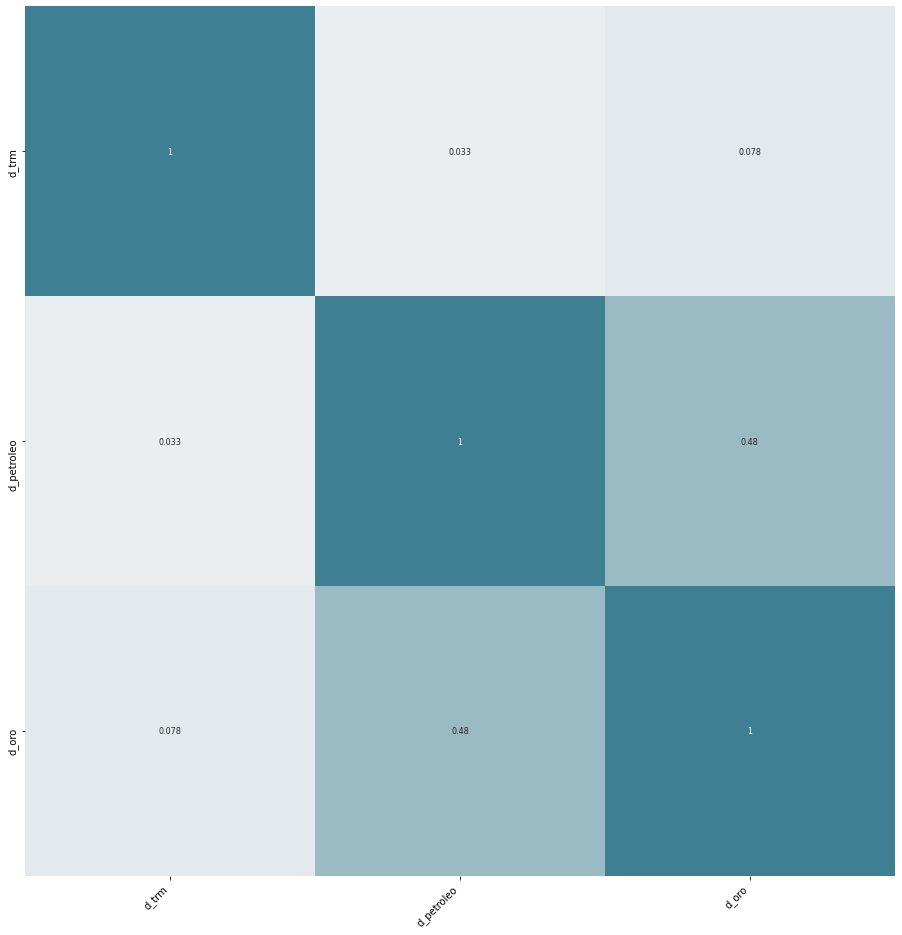

In [280]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 16))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Parte Regresion y otros modelos

In [ ]:
X_train=df_base_pivot.copy()
X_train=X_train.drop(columns=['Diferencia'])
y_train=df_base_pivot['Diferencia'] 

In [ ]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
### combinaciones
3 indicadores
2 tweeter y rss
Regresión multilineal

# Pasos a Seguir
3. Validar correlación con Lags
4. Validar correlacion spearman